<a href="https://colab.research.google.com/github/pranitj8898/Almabetter_EDA_Hotel_Booking_Analysis/blob/main/Almabetter_Bike_Sharing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Seoul Bike Sharing Demand Prediction**

**Project Type** - Regression

**Contribution** - Individual

**Name** - Pranit Jawale

# **Project Summary -**

In the heart of Seoul, a new wave of transportation is taking shape: bike sharing. As urban spaces grapple with congestion and environmental concerns, rental bikes emerge as a game-changer, promising convenience and a greener commute. However, ensuring every user has access to a bike when needed becomes a challenge. Too few bikes and users face delays; too many, and resources are wasted. Striking the right balance is pivotal. Enter the Seoul Bike Sharing Demand Prediction project. Our endeavor centers on accurately predicting hourly bike demand. By analyzing when and where bikes are most used, we can preemptively distribute resources, ensuring that a resident rushing to work or a tourist exploring the city can always find a bike ready for use.

We tap into extensive data, noting patterns of usage across times and locations. Morning rush near a subway? Weekend surge near a park? By capturing these patterns, our predictive models aim to foresee and adapt to demand shifts. Beyond just numbers, this project is about enhancing the user experience. We envision a Seoul where bike-sharing is not a mere alternative but a preferred transportation choice, seamlessly integrated into the city's rhythm. In essence, our mission is clear: optimize bike availability through data-driven predictions, ensuring a smoother, more efficient bike-sharing experience for all of Seoul’s residents and visitors.

# **GitHub Link -**

https://github.com/pranitj8898

# **Problem Statement**

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines : -**

1. Well-structured, formatted, and commented code is required.

2. Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

3. The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
Each and every logic should have proper comments.

4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

 Chart visualization code
  Why did you pick the specific chart?

  What is/are the insight(s) found from the chart?

  Will the gained insights help creating a positive business impact?

  Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Cross- Validation & Hyperparameter Tuning

 Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 Explain each evaluation metric's indication towards business and the business impact pf the ML model used

# **Data Description**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:


* Date : year-month-day

* Rented Bike count - Count of bikes rented at each hour

* Hour - Hour of he day

* Temperature-Temperature in Celsius

* Humidity - %

* Windspeed - m/s

* Visibility - 10m

* Dew point temperature - Celsius

* Solar radiation - MJ/m2

* Rainfall - mm

* Snowfall - cm

* Seasons - Winter, Spring, Summer, Autumn

* Holiday - Holiday/No holiday

* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Let's Begin !**

#**1. Know Your Data**

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting max display column limit to 20
pd.set_option("display.max_columns", 20)

#set style
plt.style.use('seaborn')


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')


<ipython-input-1-0d04cc9ca673>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Reading CSV file.
bike_df=pd.read_csv('/content/SeoulBikeDataset.csv', encoding='ISO-8859-1')

In [4]:
bike_df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [5]:
#Shape of dataset
bike_df.shape

(8760, 14)

# **Observations:**

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

* **missing values**- 0

 * **Rename** **columns**-



In [7]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Temperature(°C)

Humidity(%)

Wind speed (m/s)

Visibility (10m)

Dew point temperature(°C)

Solar Radiation (MJ/m2)

Rainfall(mm)

Snowfall (cm)

Rented Bike Count,Functioning Day

In [8]:
# remove blank spaces with underscore
bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)


In [9]:
# Change The datatype of Date columns to extract 'Month' ,'Day', "year". so  further we can analyze the Bike rentals with respect to year months and days.
bike_df['Date']=bike_df['Date'].astype('datetime64[ns]')


In [10]:
# Creating new columns 'Month', 'Year' ,'Day.
bike_df['Month']=bike_df['Date'].dt.month

bike_df['Day']=bike_df['Date'].dt.day_name()

In [11]:
#  separating weekend and weekdays
bike_df['Weekdays_or_weekend']=bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)



In [12]:
bike_df.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  Month       Day  Weekdays_or_weekend  
0  Winter  No Holiday             Yes      1  Thursday                    0  
1  Winter  No Holiday             Yes      1  Thursday                    0  
2  Winter  No Holiday             Yes      1  Thursday                    0  
3  Winter  No Holiday             Yes      1  Thursday                    0  
4  Winter  No Holiday             Yes      1  Thursday                    0

In [13]:
# Drop Day and Date columns.

bike_df.drop(['Date',"Day"],axis=1 ,inplace=True)


In [14]:
# total no's associate with weather or seasons
bike_df['Seasons'].value_counts()


Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [15]:
# check for Null values in our bike data

bike_df.isnull().sum()


Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Weekdays_or_weekend      0
dtype: int64

* no null data

Text(0.5, 1.0, ' Visualising Missing Values')

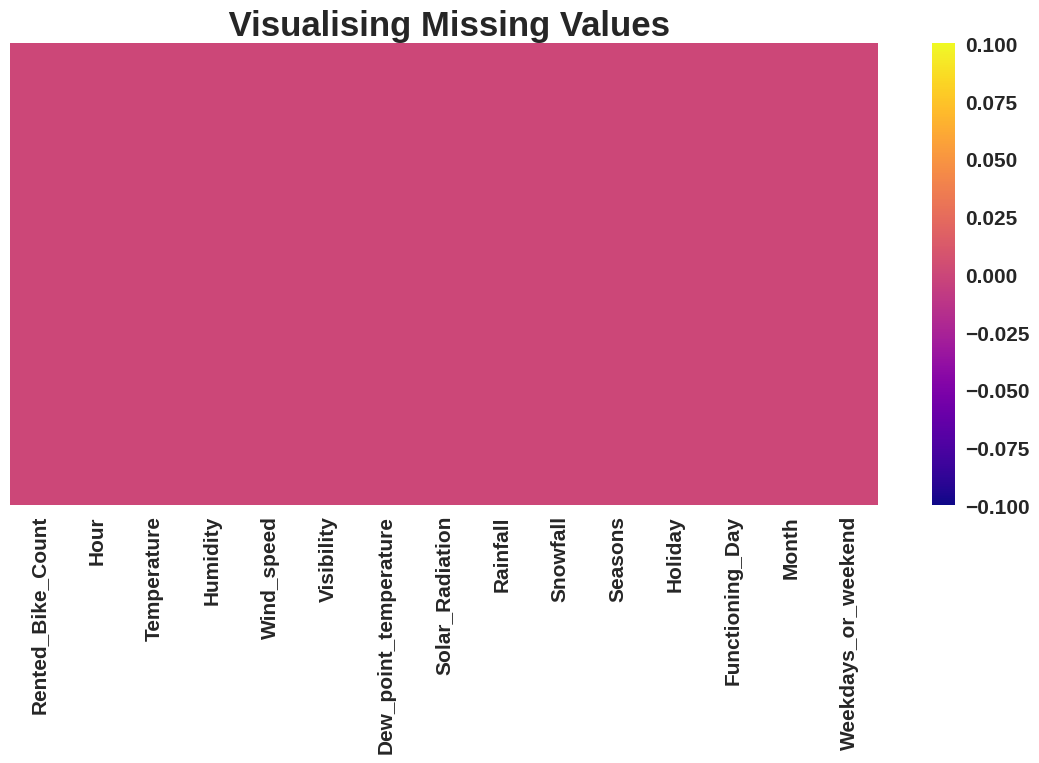

In [16]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(14,6))
sns.heatmap(bike_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")


* checking Duplicates

In [17]:
duplicates=bike_df.duplicated().sum()


In [18]:
duplicates

0

No duplicate rows found

#**Exploratory Data Analysis**

In [19]:
# create numeric columns list.
numeric_col=bike_df.describe().columns.tolist()
numeric_col

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Month',
 'Weekdays_or_weekend']

In [20]:
# create categorical column list
categorical_columns= list(set(bike_df.columns) - set(bike_df.describe().columns))
categorical_columns

['Functioning_Day', 'Holiday', 'Seasons']

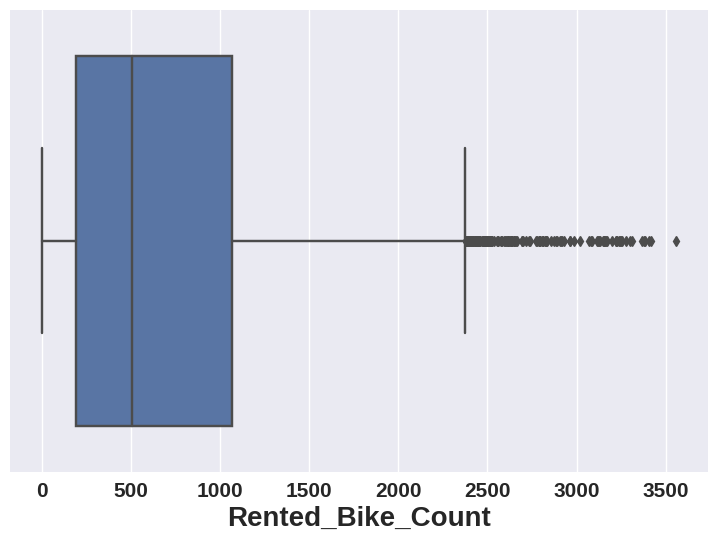

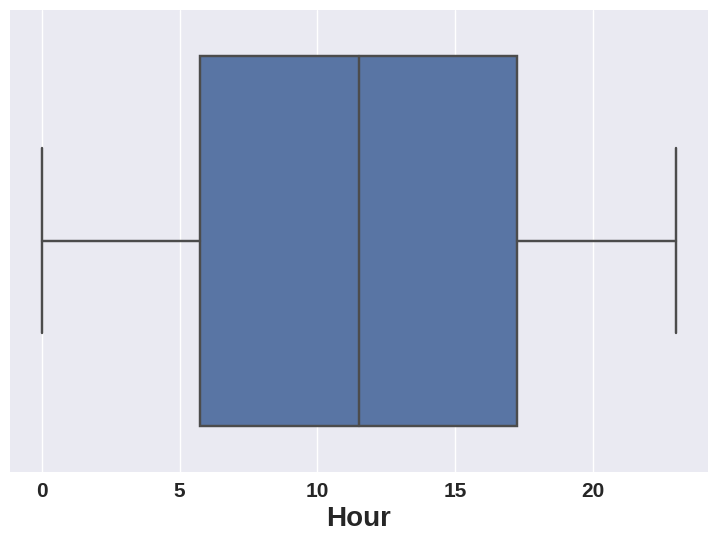

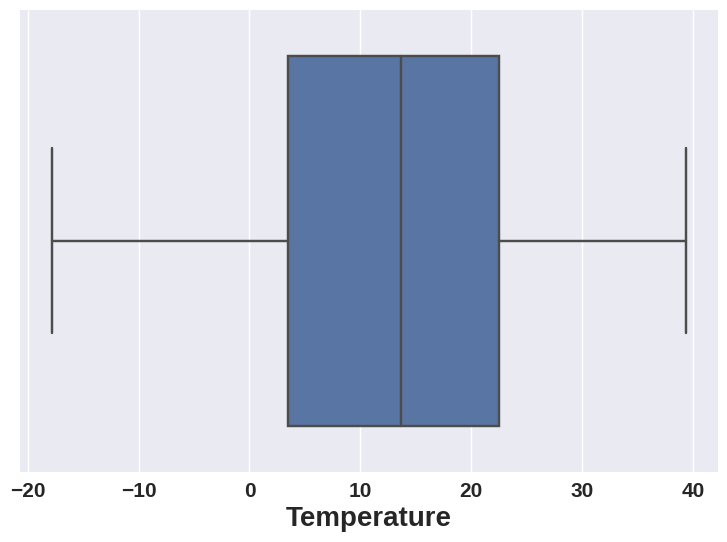

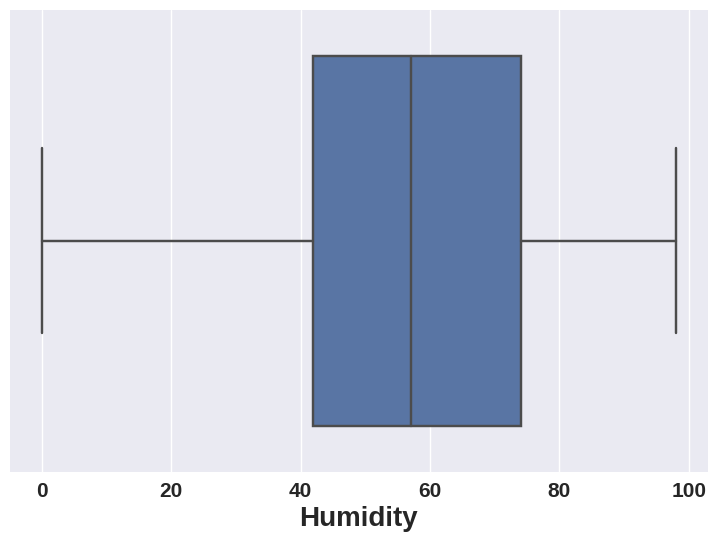

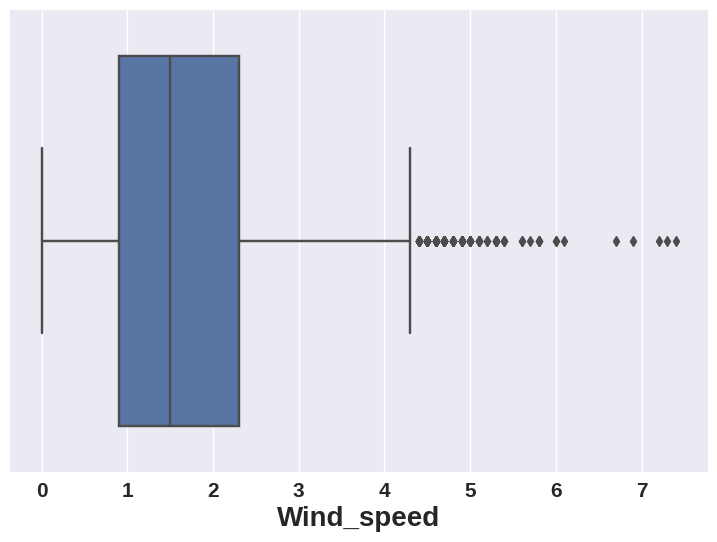

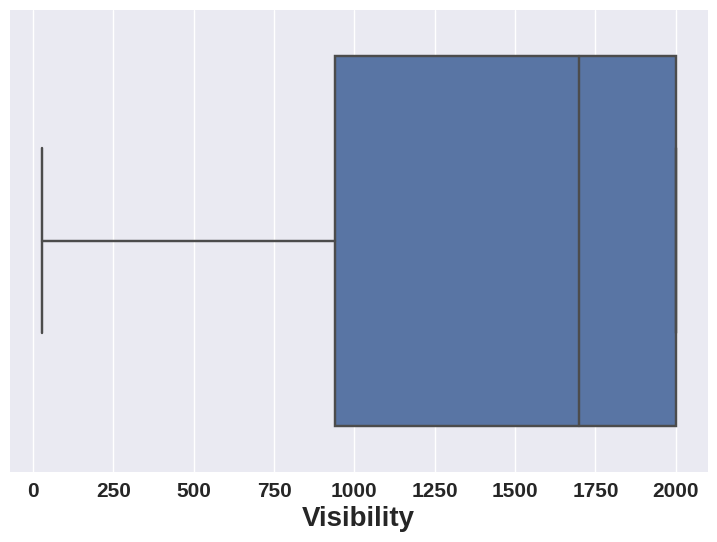

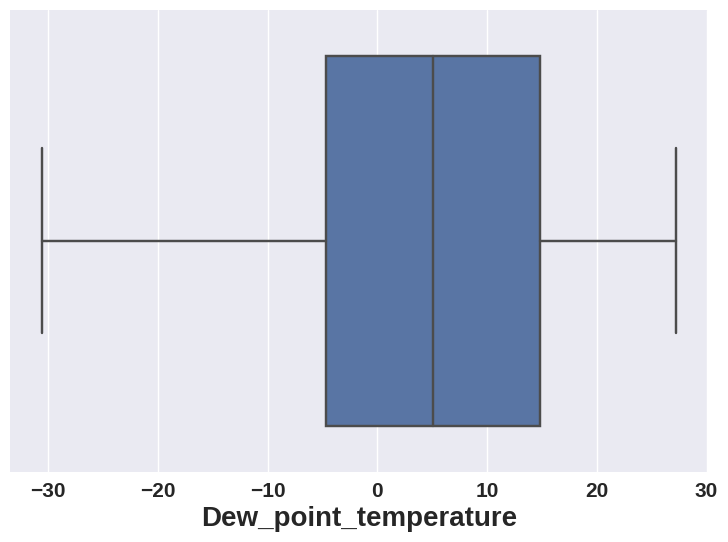

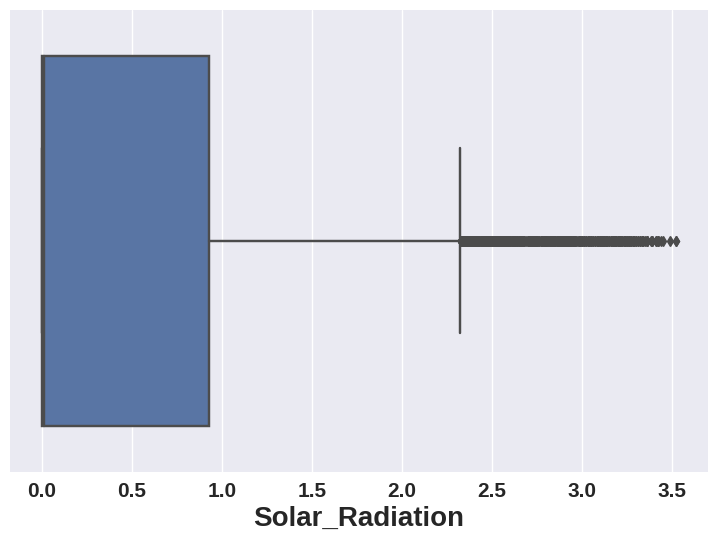

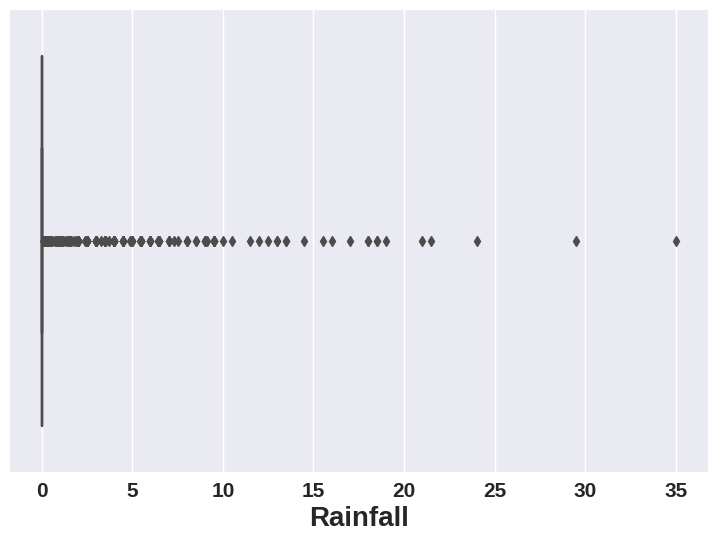

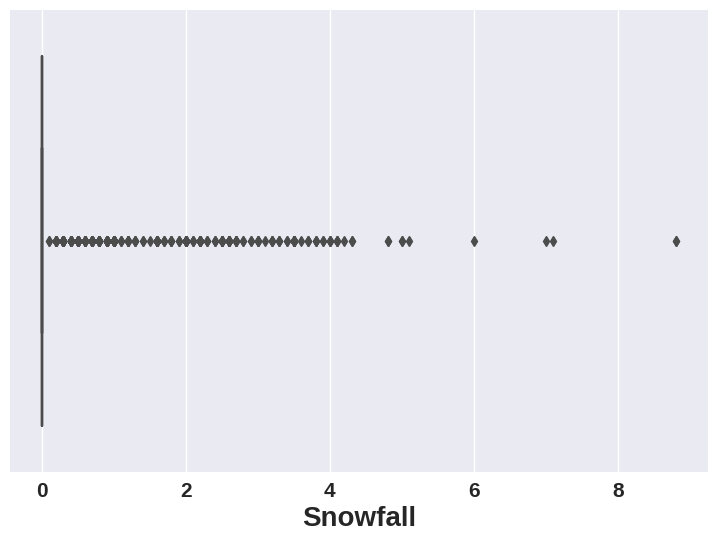

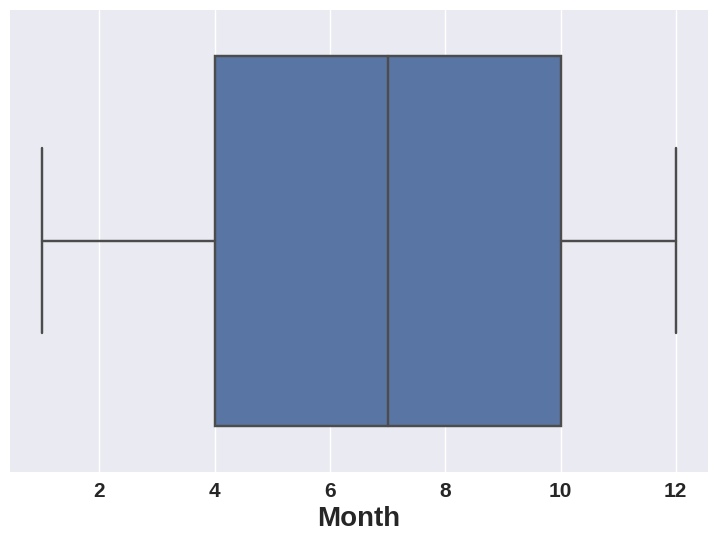

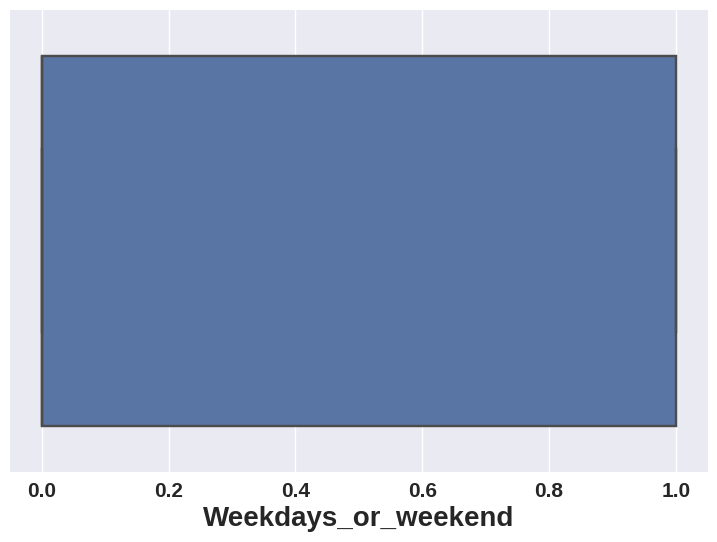

In [21]:
# priting box plot of numeric columns to check oultliers
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=bike_df[col])


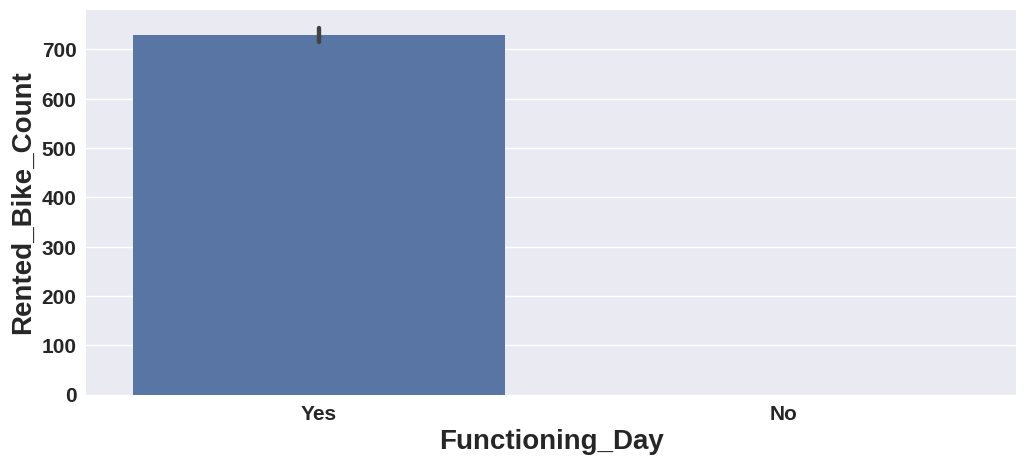

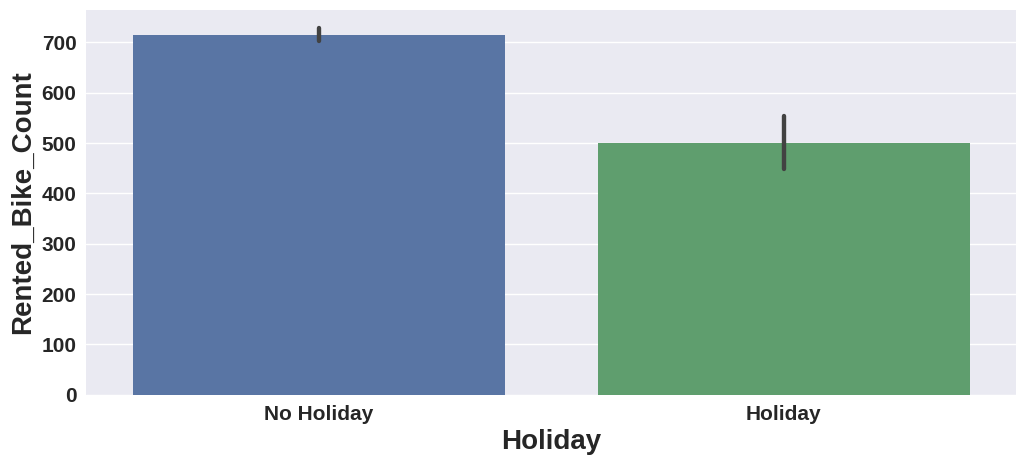

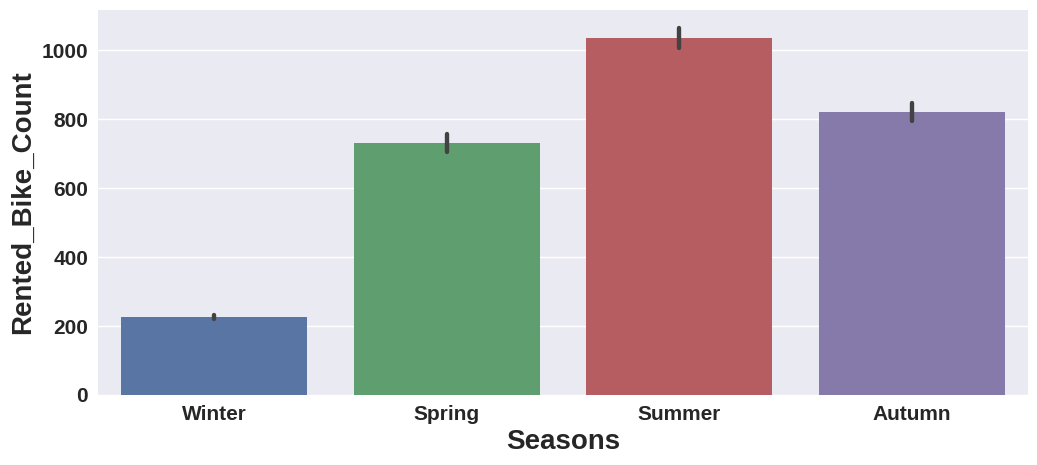

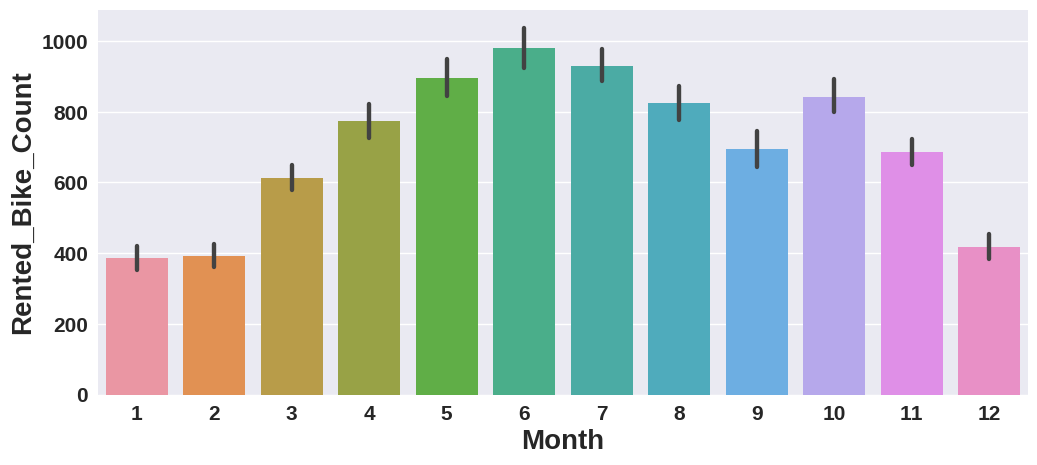

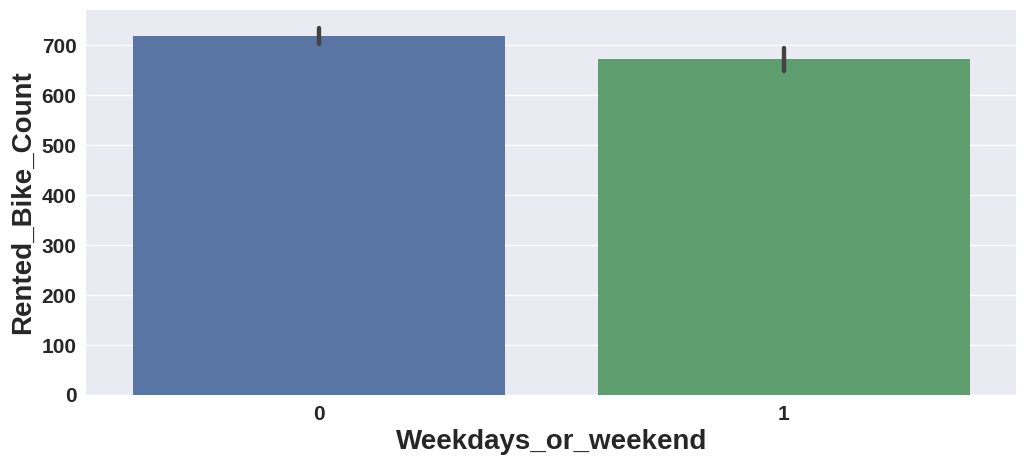

In [22]:
# adding columns
categorical_columns.extend(['Month','Weekdays_or_weekend'])

# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'])

* Bike rental counts are highest during the summer season. It's more common for people to rent bikes in the summer compared to other times of the year. In contrast, the winter sees the fewest bike rentals among all seasons.

* High number of bikes were rented on No Holidays.

* On the days when bikes were not rented, there were 295 instances marked as "NO". We can remove these 295 entries. However, a column with only "Yes" doesn't provide any additional value to our analysis. So, we will eliminate such columns in the subsequent steps.

* More bikes were rented on weekdays than on weekends.

*  From March Bike Rent Count started increasing and it was highest in June.

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

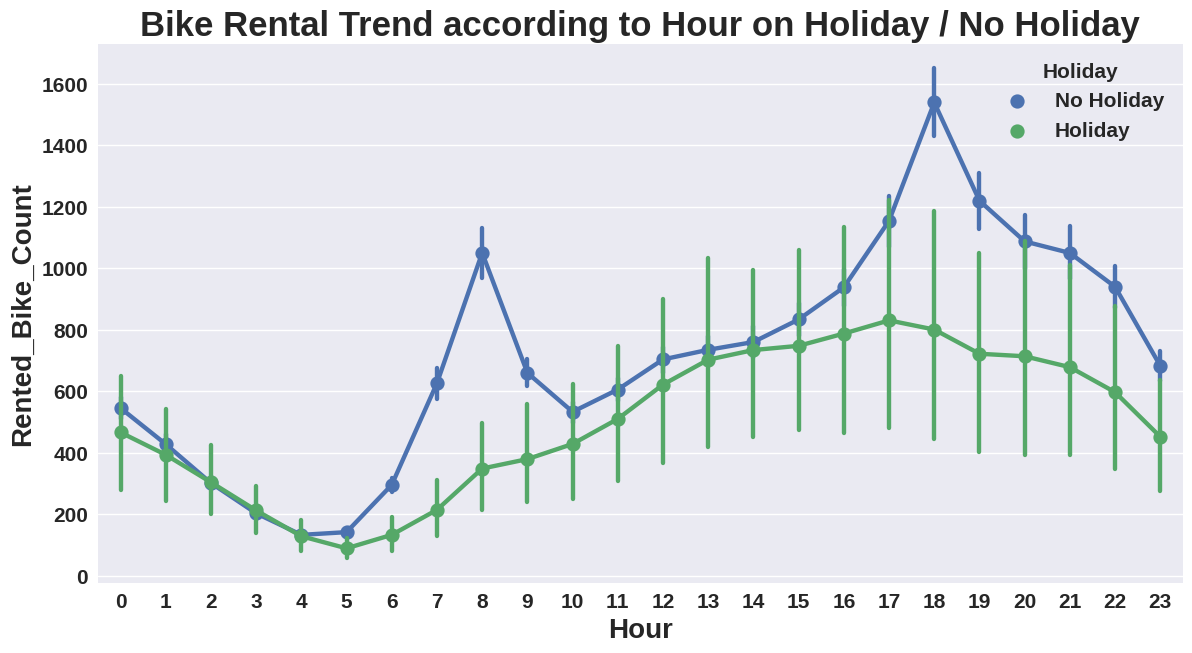

In [23]:
# Bike Rental trend.
plt.figure(figsize=(14,7))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

* Between 6/7AM and 10 AM, there is a noticeable surge in bike rentals, likely due to office-goers and students commuting to work and college respectively. However, on holidays, the number of bike rentals during these hours decreases significantly. Another spike in rentals is observed from 10 AM to 7 PM on non-holiday days, possibly correlating with the end of office hours for many commuters.

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

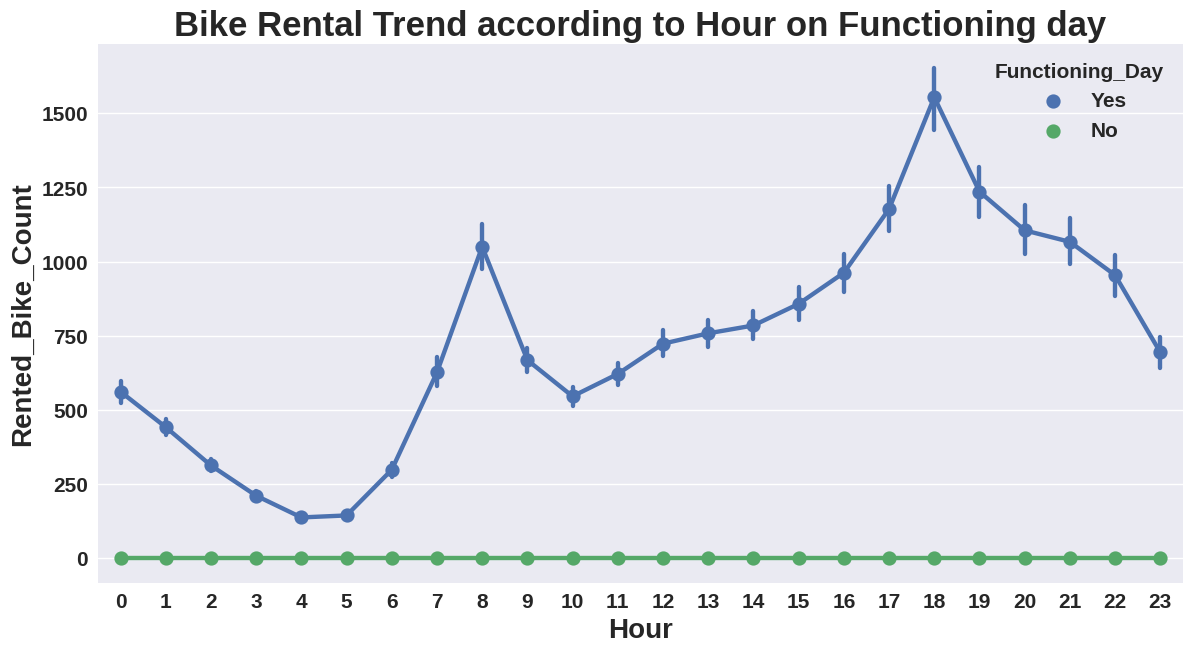

In [24]:
## Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(14,7))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")


* On functional days, the trend for bike rentals is consistent with that of non-holiday days. However, on non-functional days, there are no bike rentals at all.

If we remove rows with non-functioning days, we'll only have data from functioning days. Consequently, a column with consistent values throughout becomes redundant and it's advisable to discard it.






Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Seasons')

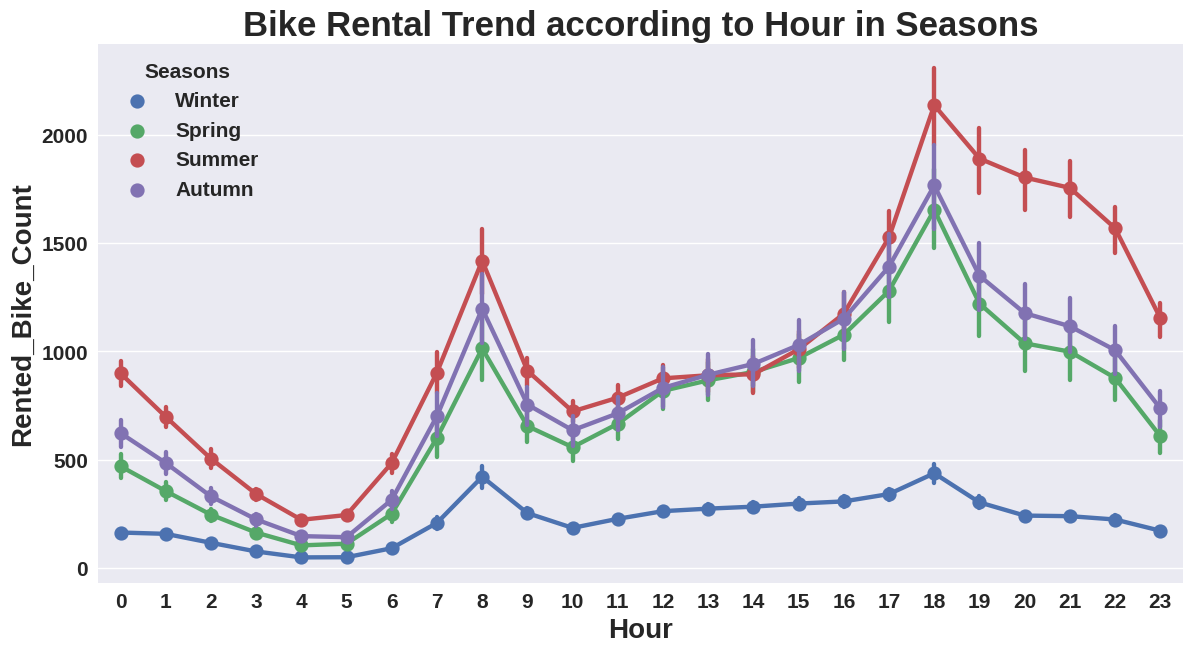

In [25]:
## Bike Rent Count trend with respect Hours on Seasons.
plt.figure(figsize=(14,7))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Seasons'])
plt.title("Bike Rental Trend according to Hour in Seasons")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in different months')

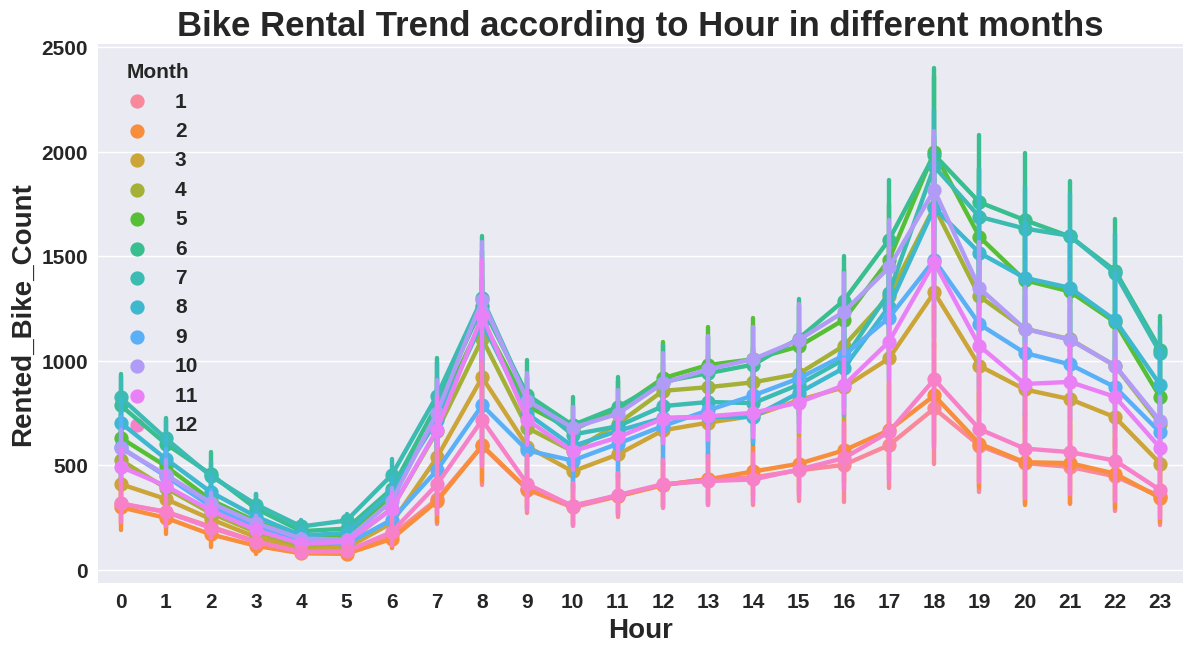

In [26]:
# Bike Rent Count trend with respect Hours on Months
plt.figure(figsize=(14,7))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Month'])
plt.title("Bike Rental Trend according to Hour in different months")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Weekdays_or_weekend.')

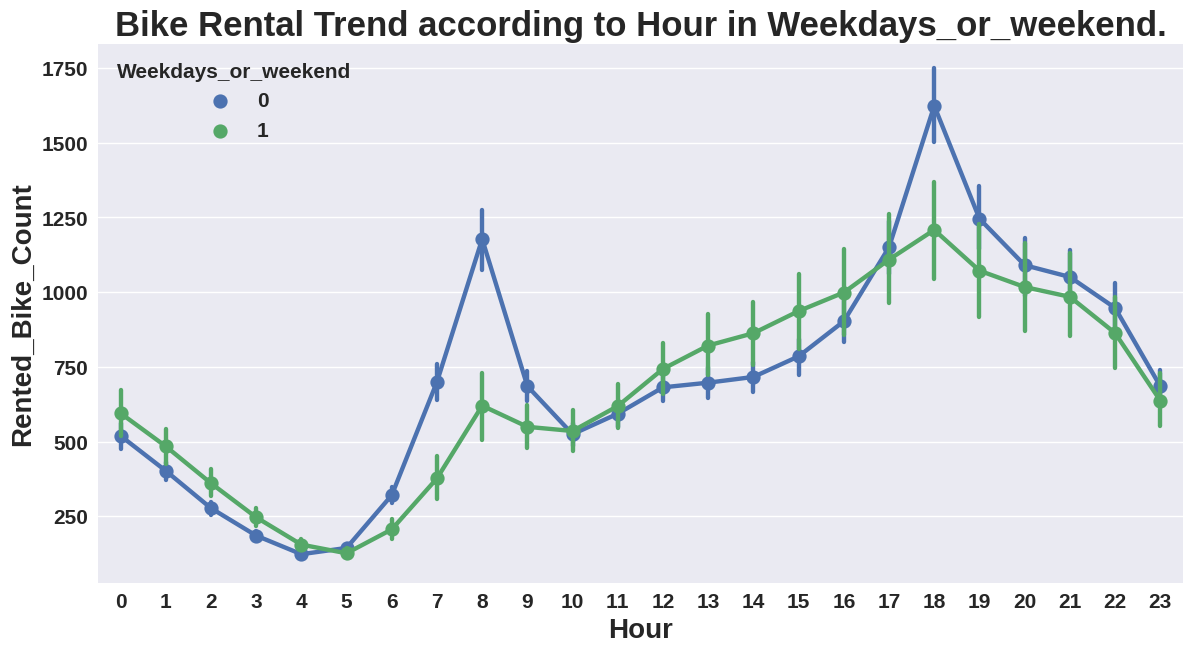

In [27]:
## Bike Rent Count trend with respect Hours on Weekdays or weekends
plt.figure(figsize=(14,7))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")

<Axes: xlabel='Rented_Bike_Count'>

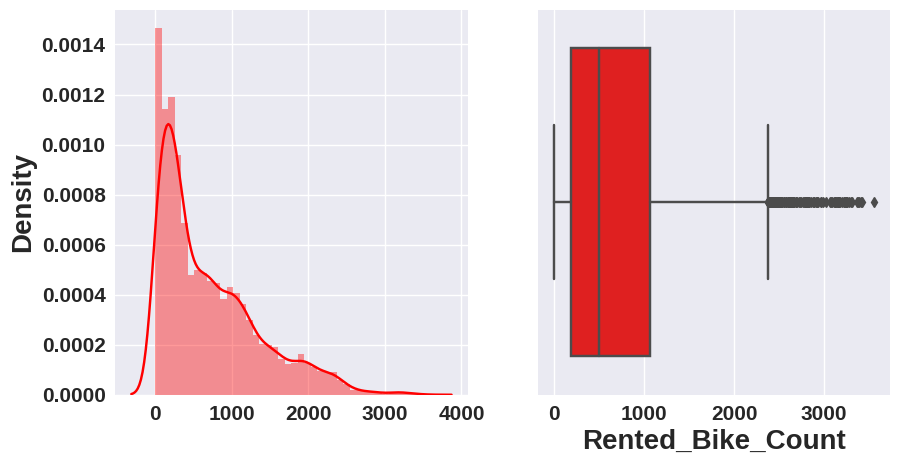

In [28]:
#check distribution of target variable- "Bike Rented Count"
# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.distplot(x=bike_df['Rented_Bike_Count'],color='red',ax=axes[0])
# plt.figure(figsize=(10,5))
sns.boxplot(x=bike_df['Rented_Bike_Count'],color='red',ax=axes[1])

* The distribution of our target variable is mildly skewed to the right.

<Axes: xlabel='Rented_Bike_Count'>

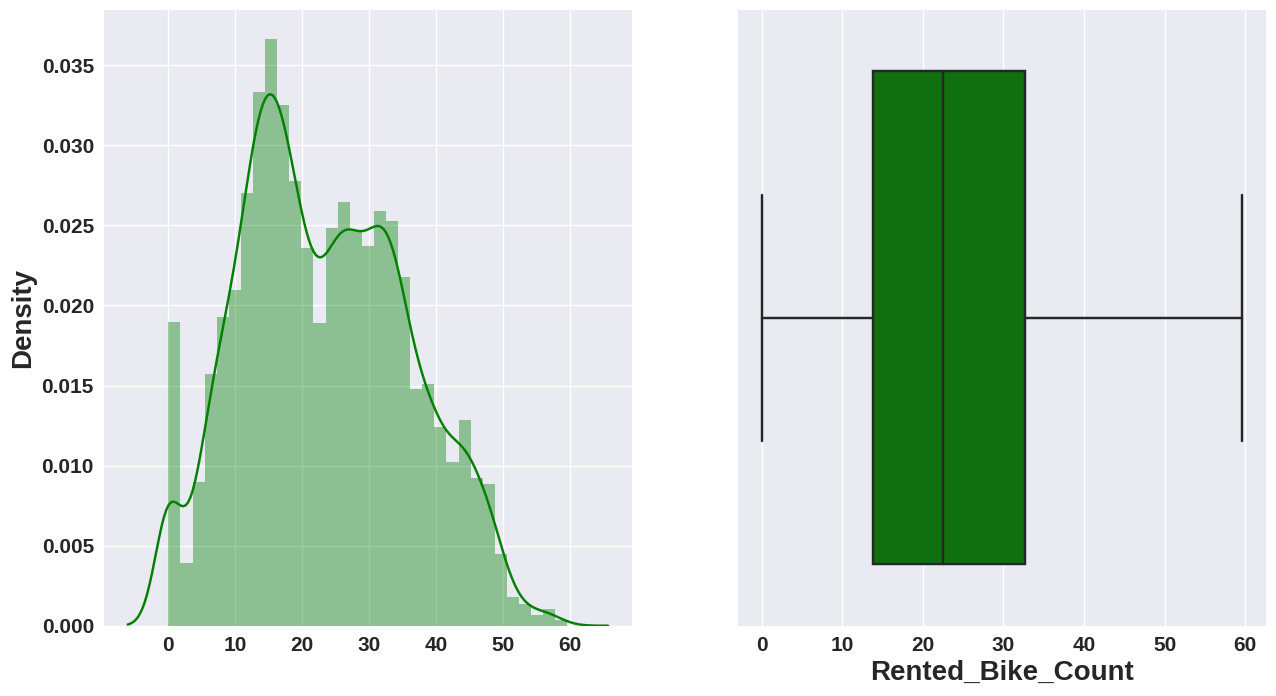

In [29]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(bike_df['Rented_Bike_Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']),color='g',ax=axes[1])

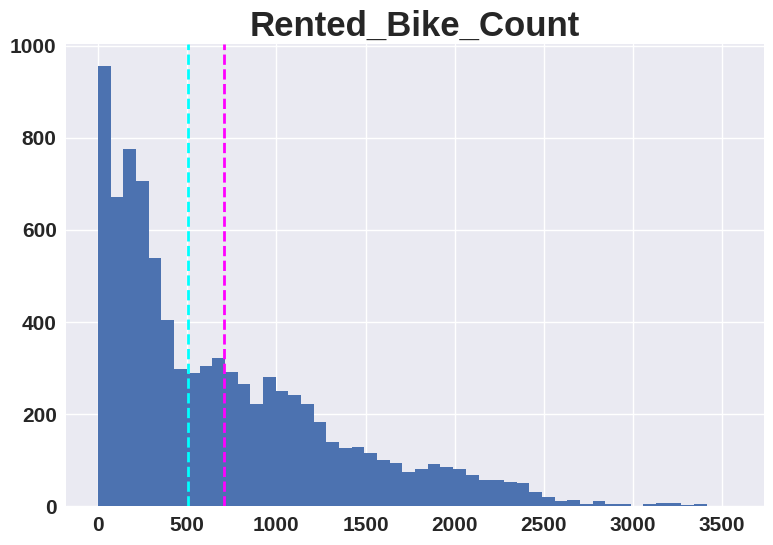

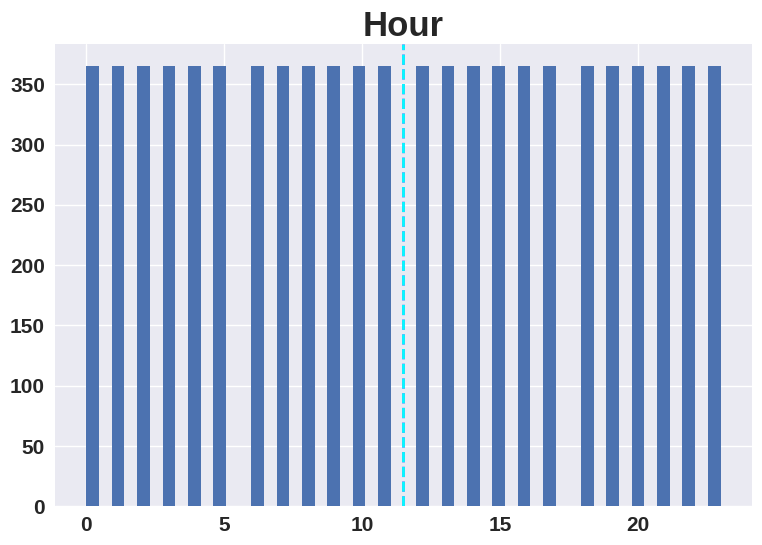

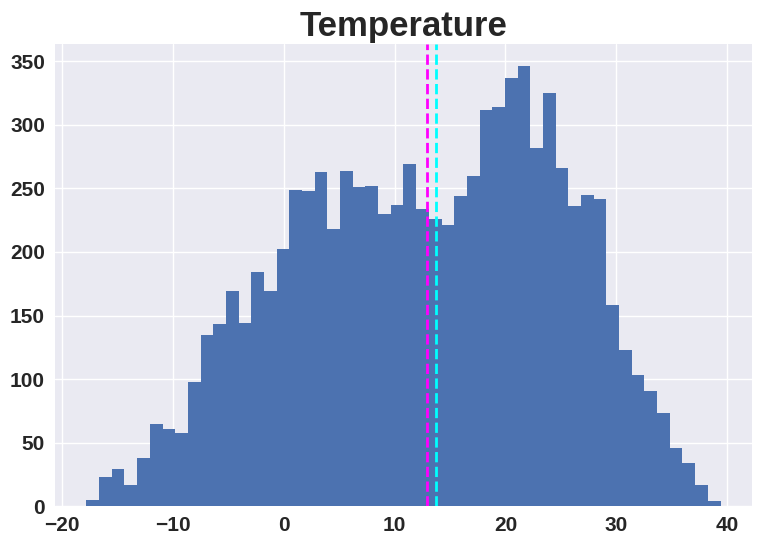

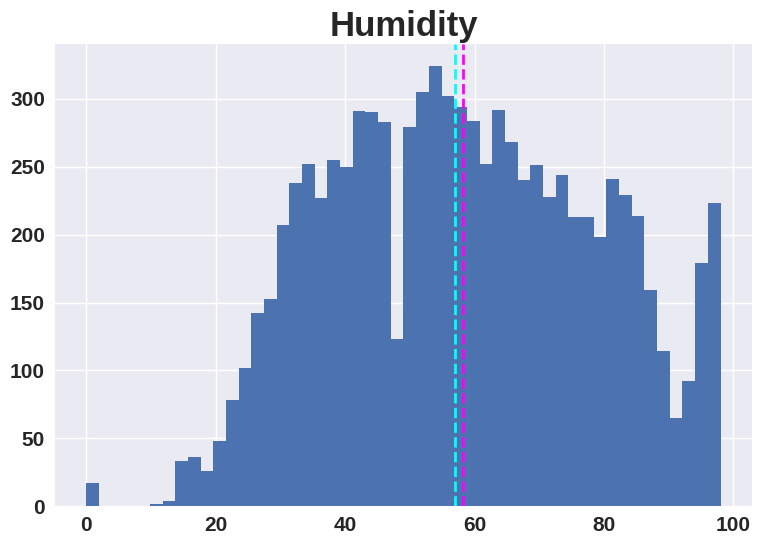

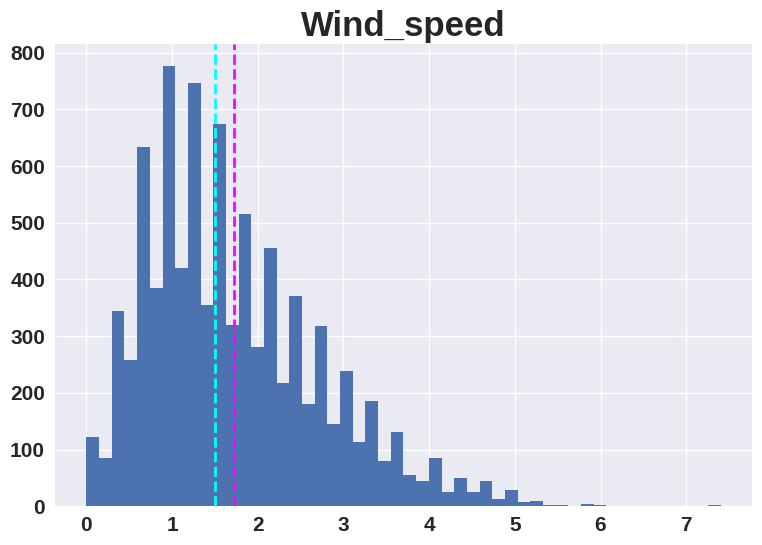

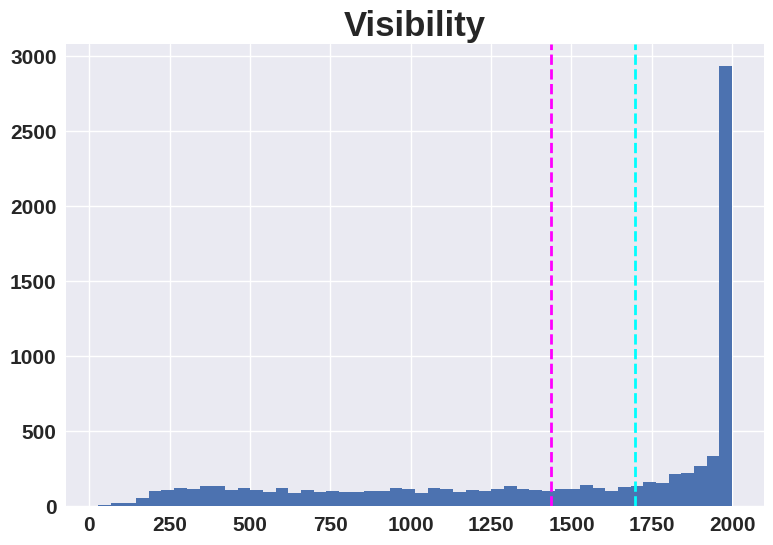

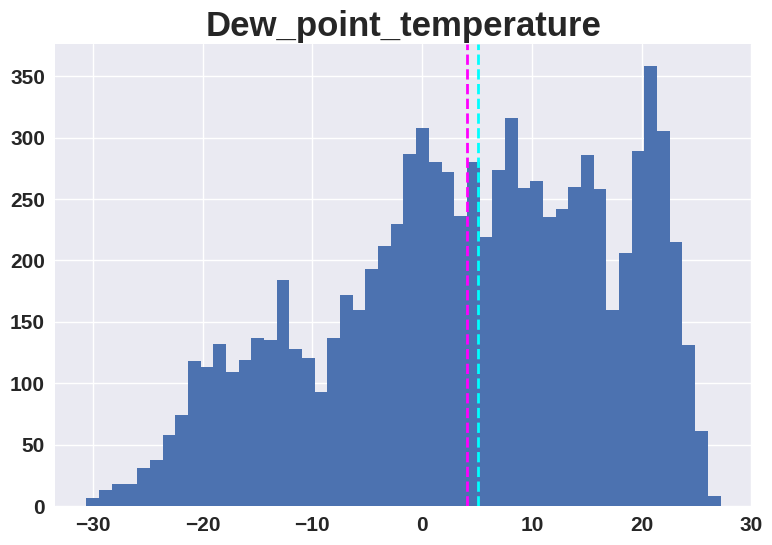

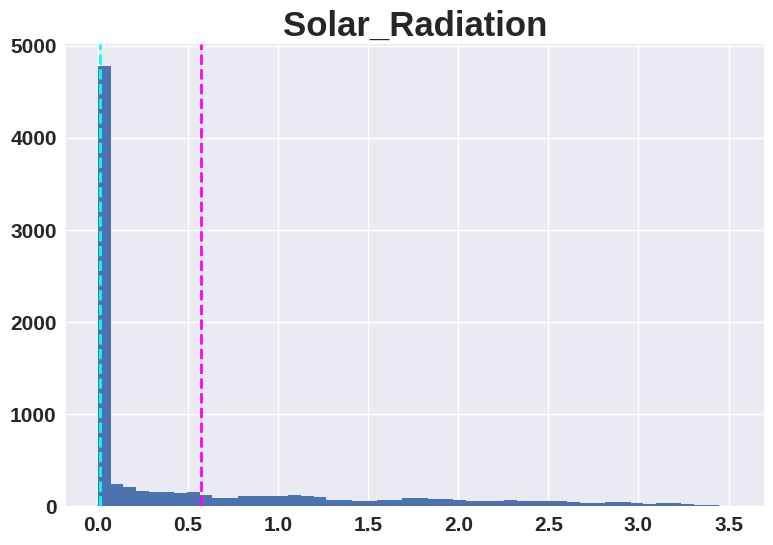

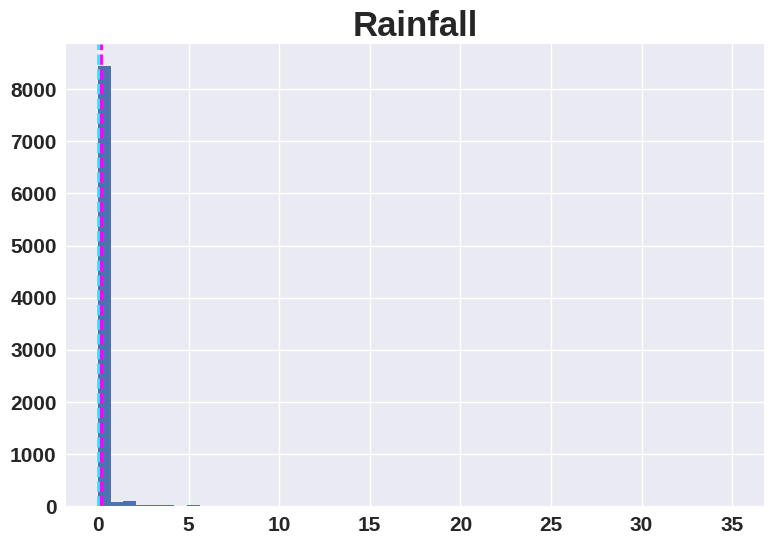

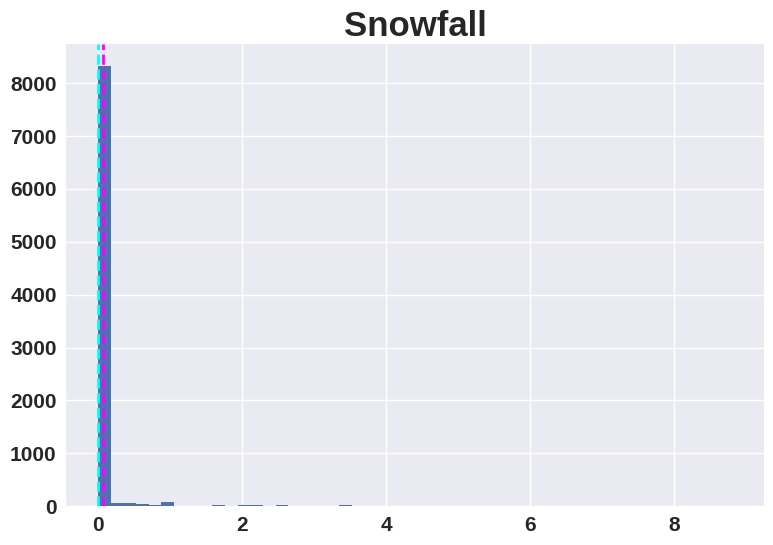

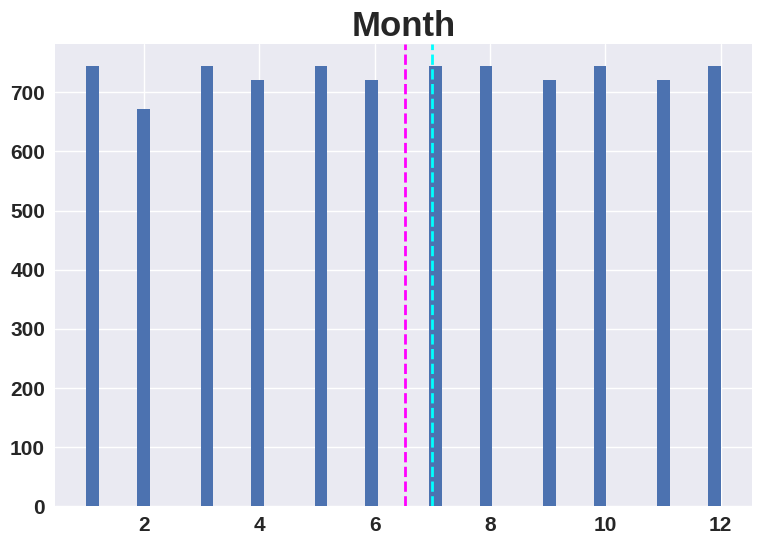

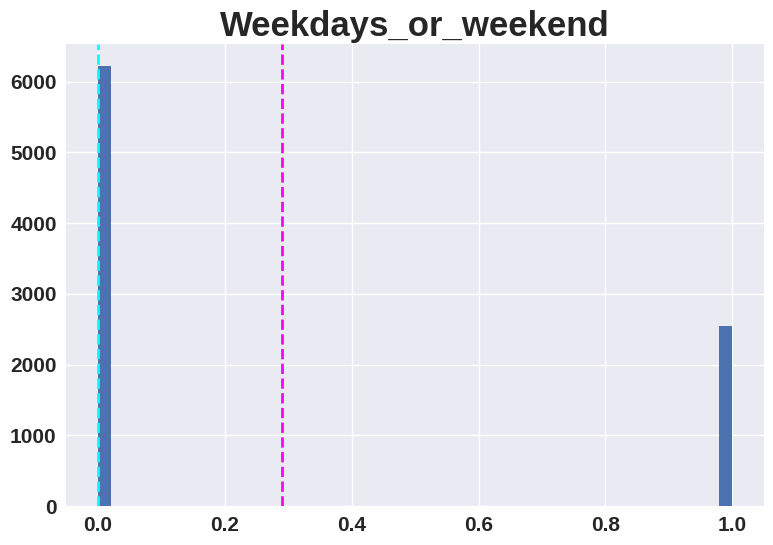

In [30]:
#check distribution of independent variables
#histogram
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

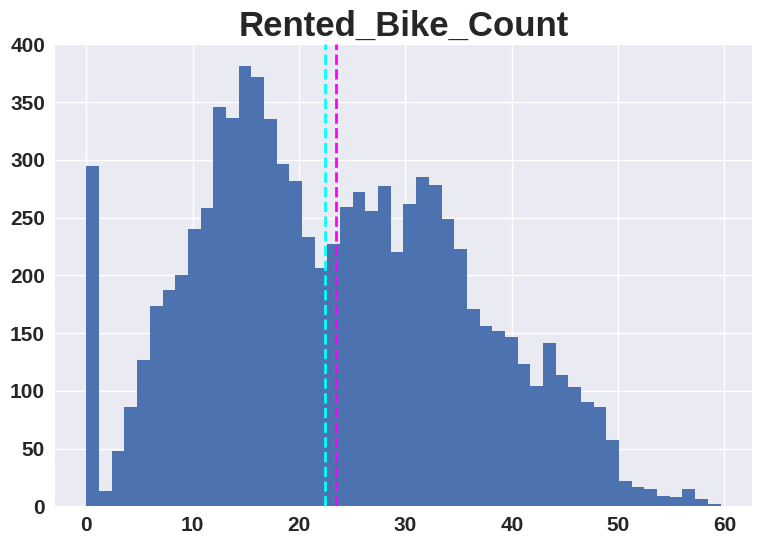

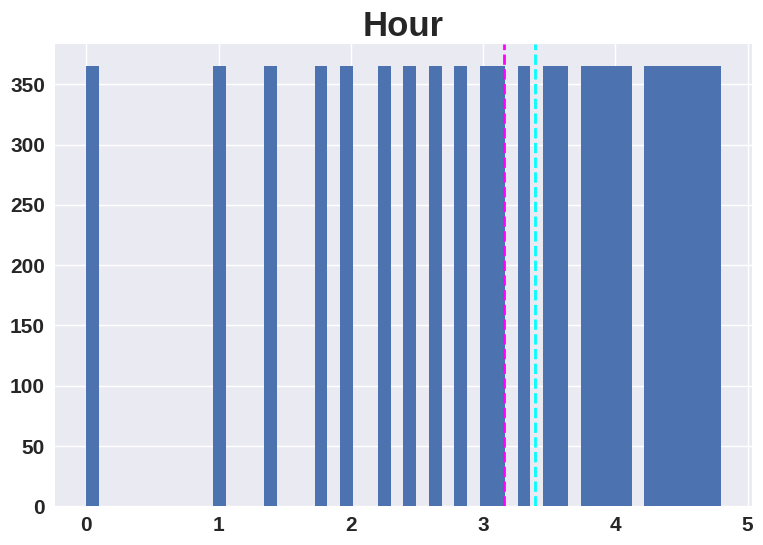

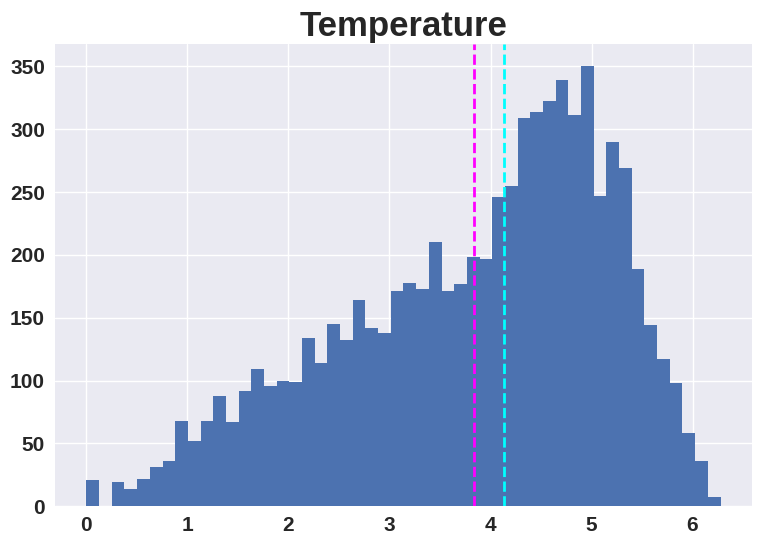

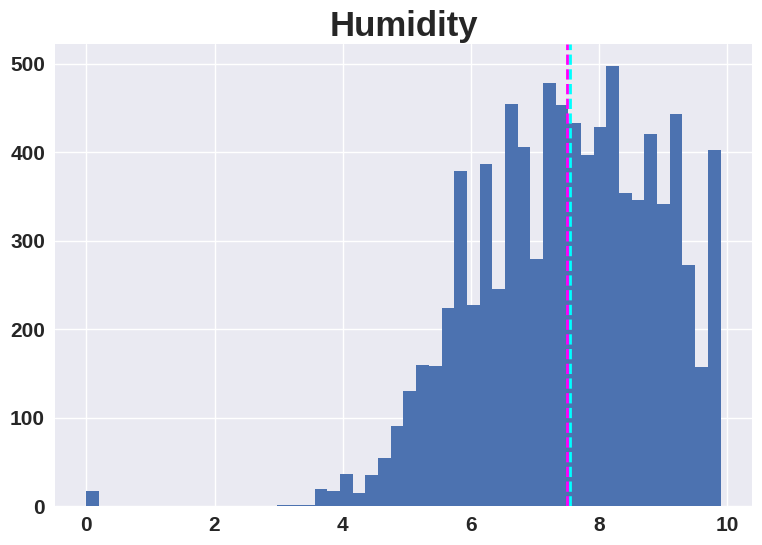

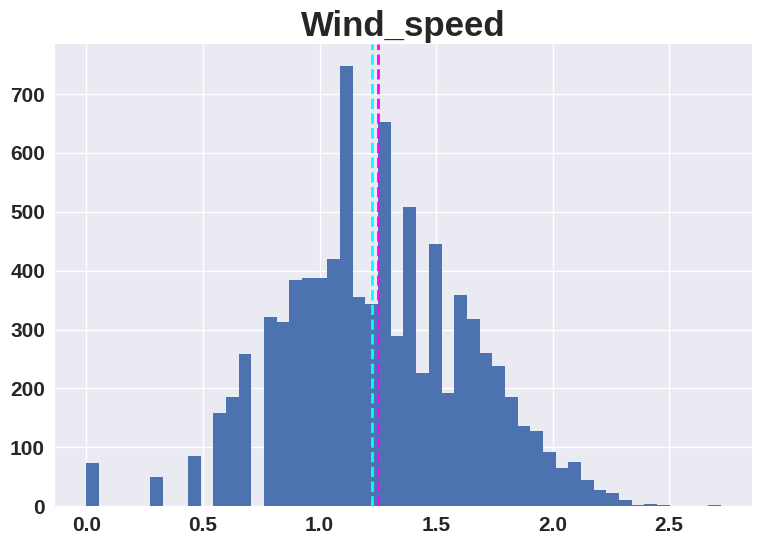

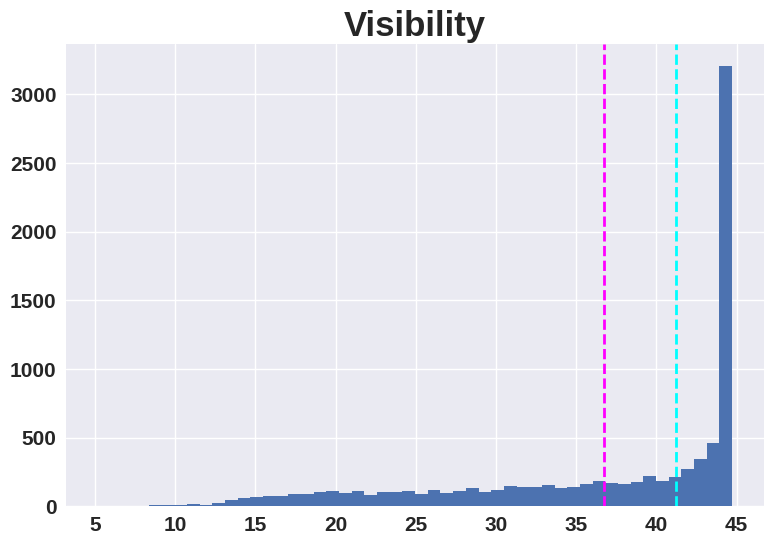

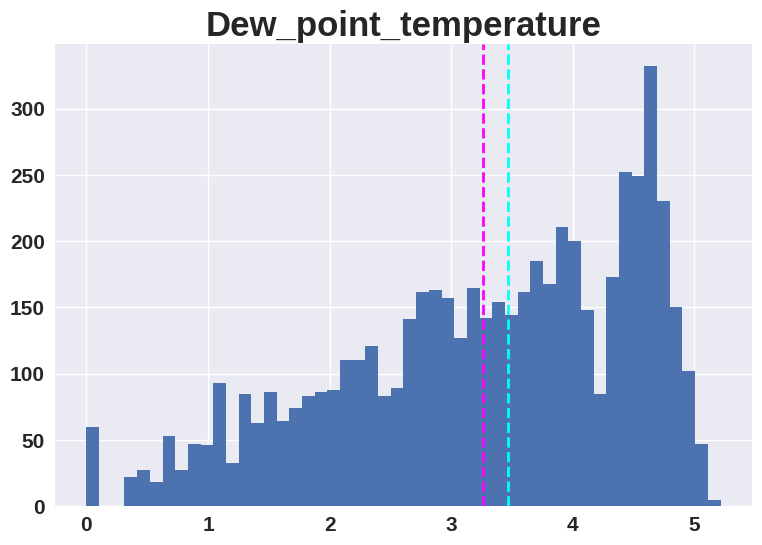

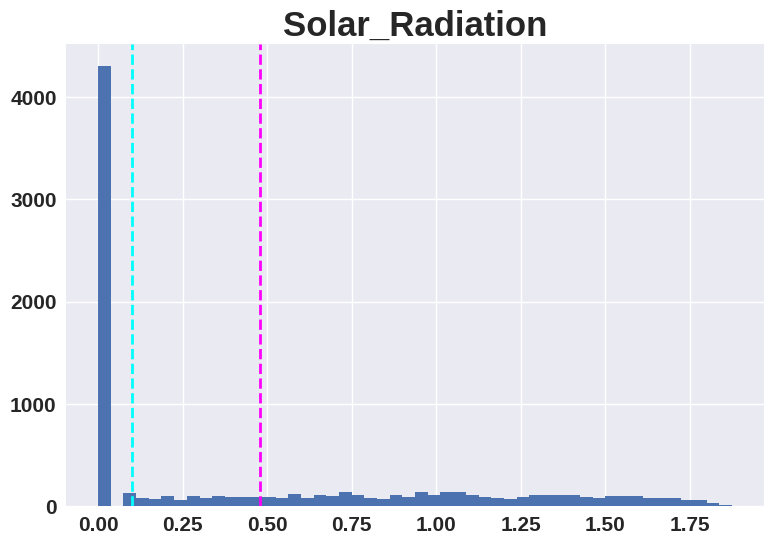

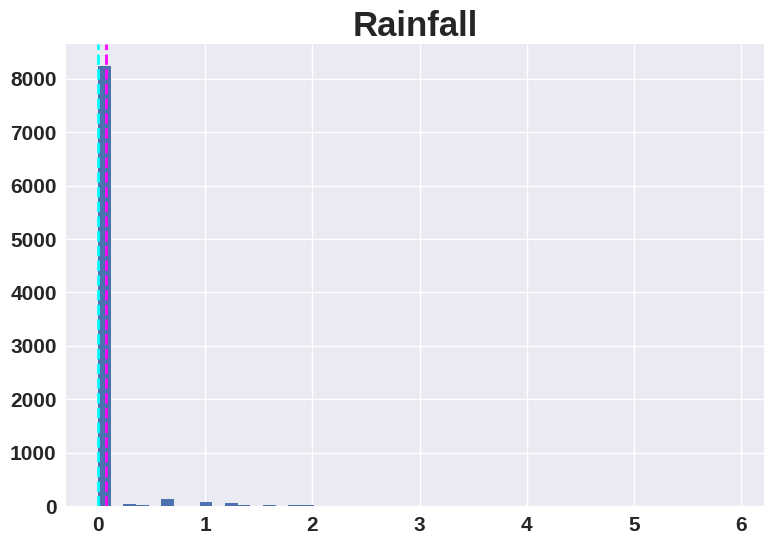

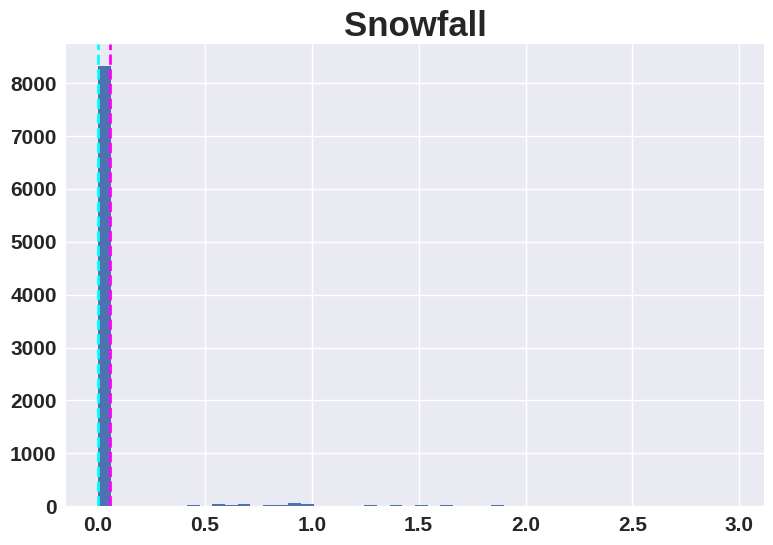

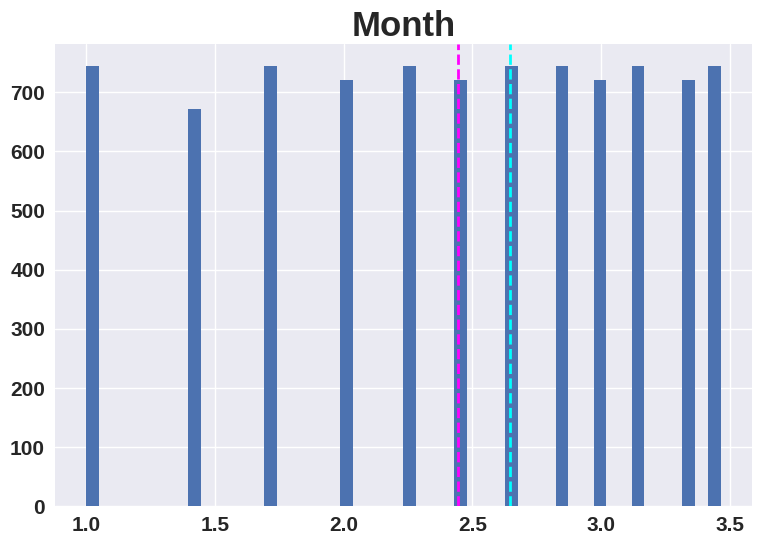

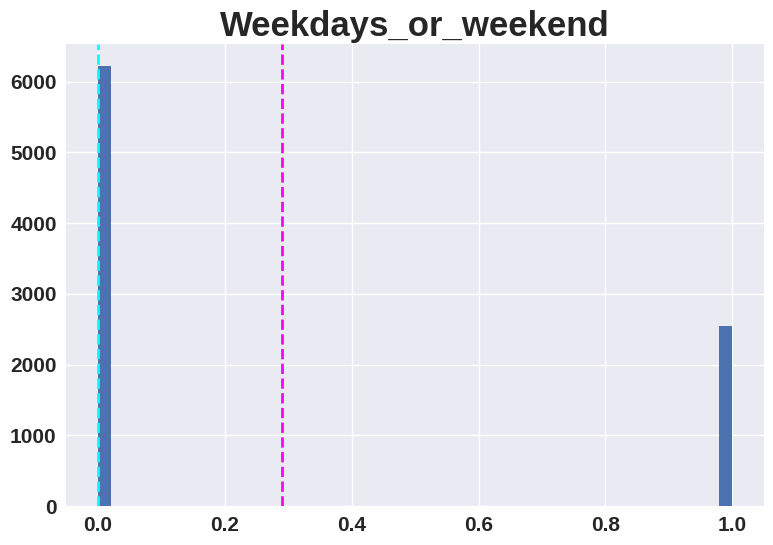

In [31]:
# Normalizing The variables using squre root method.
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()


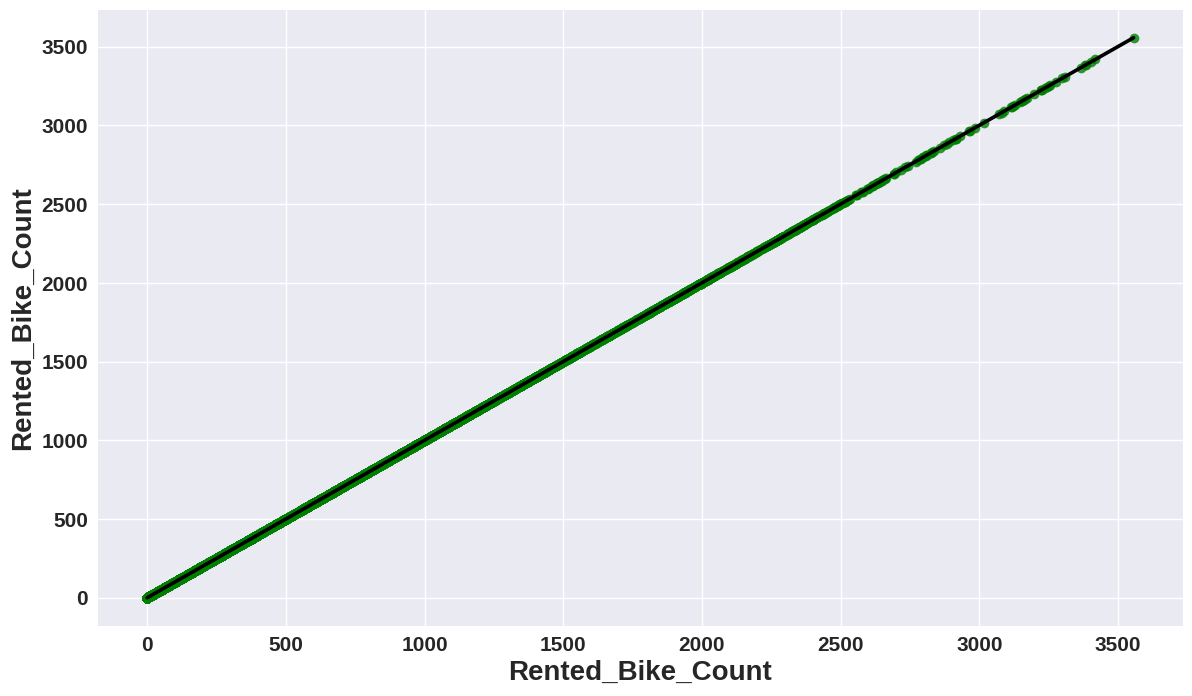

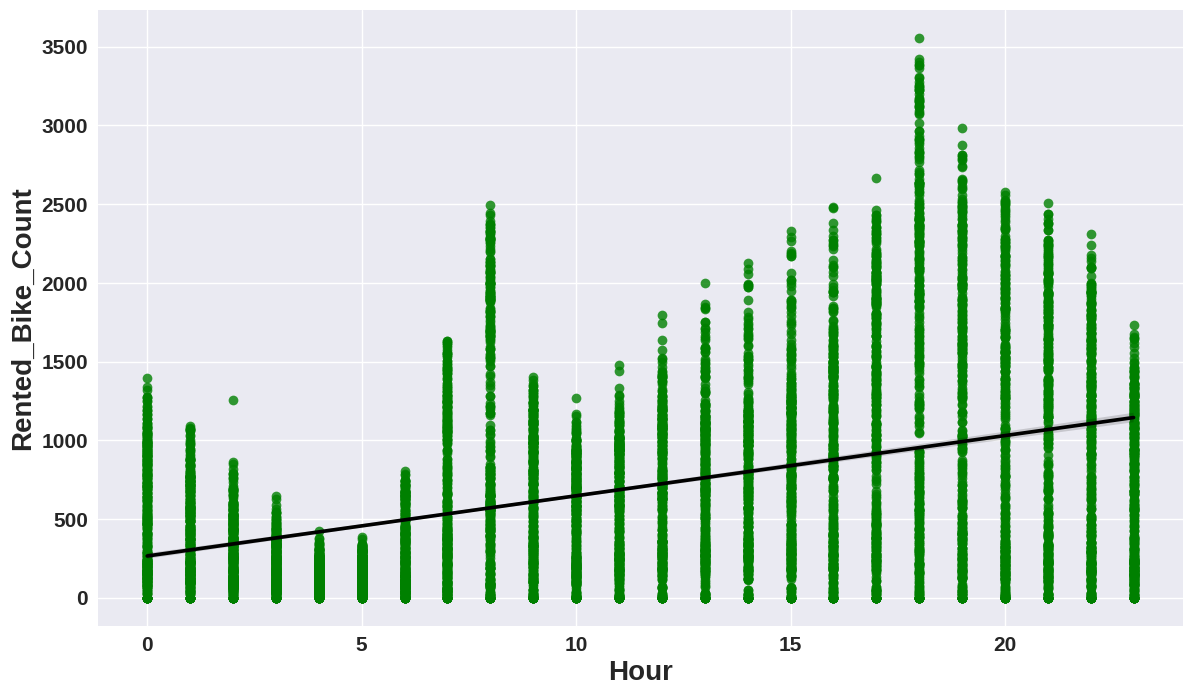

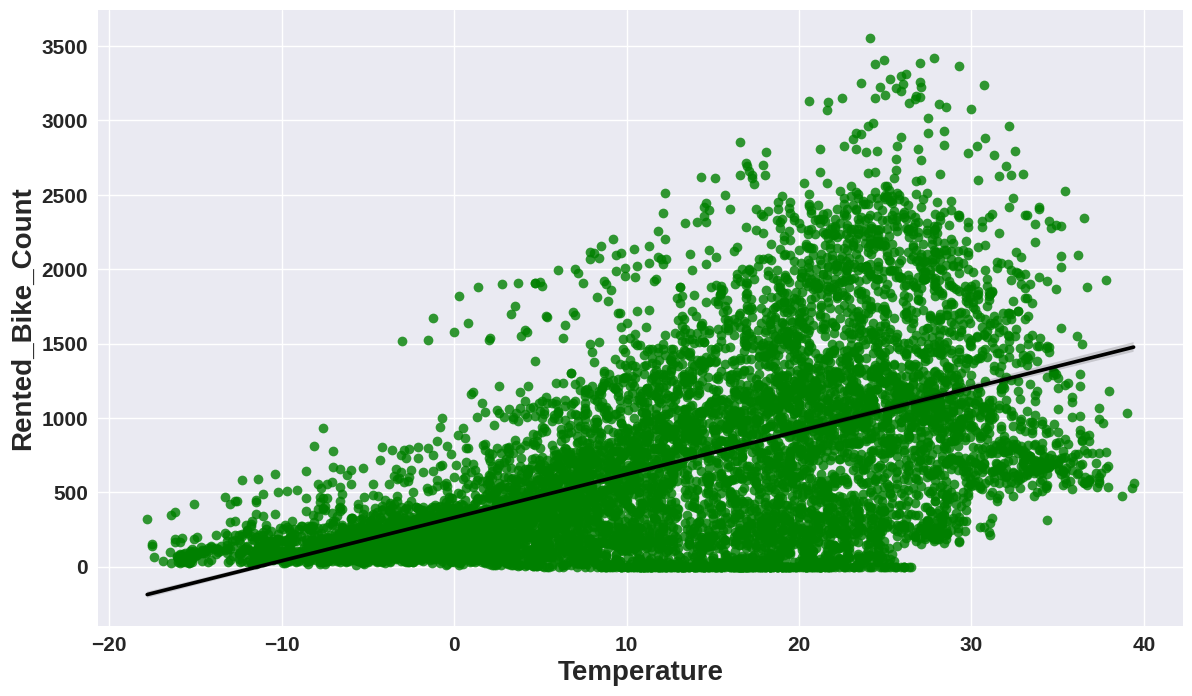

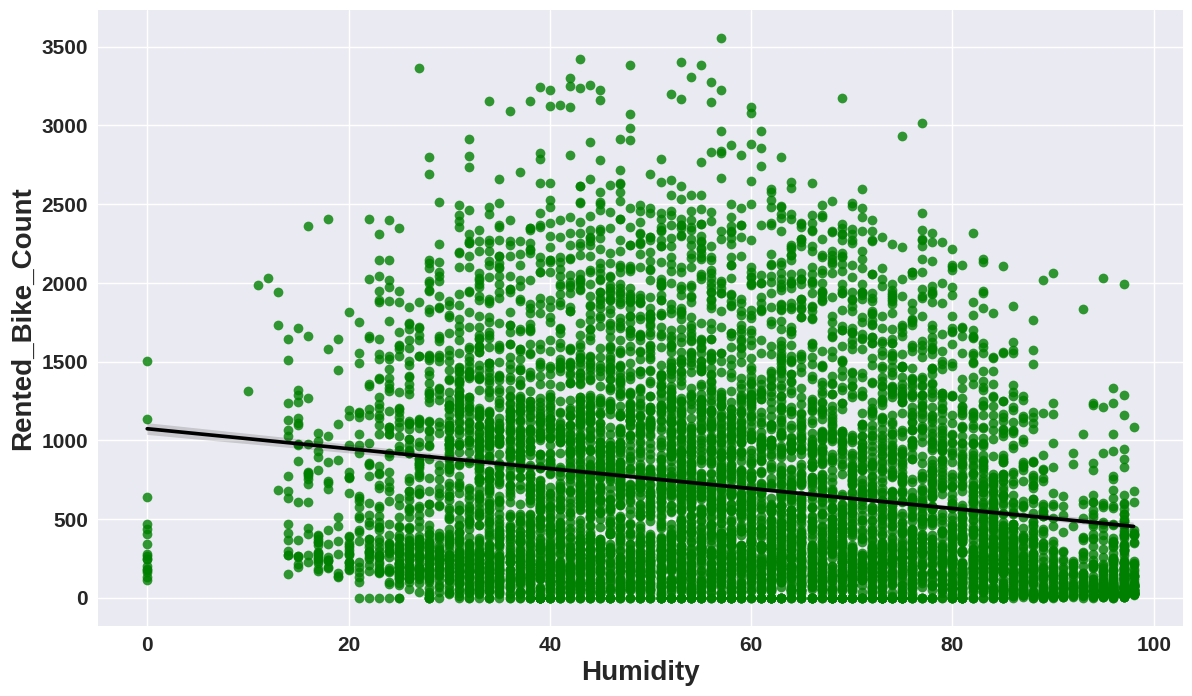

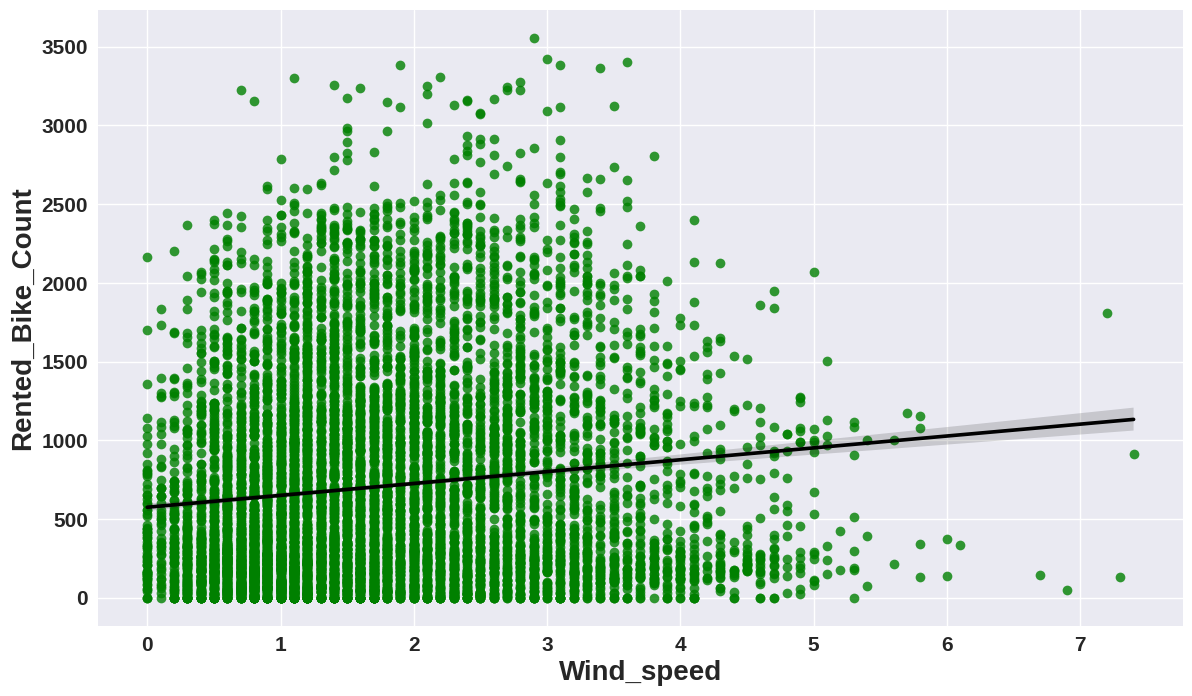

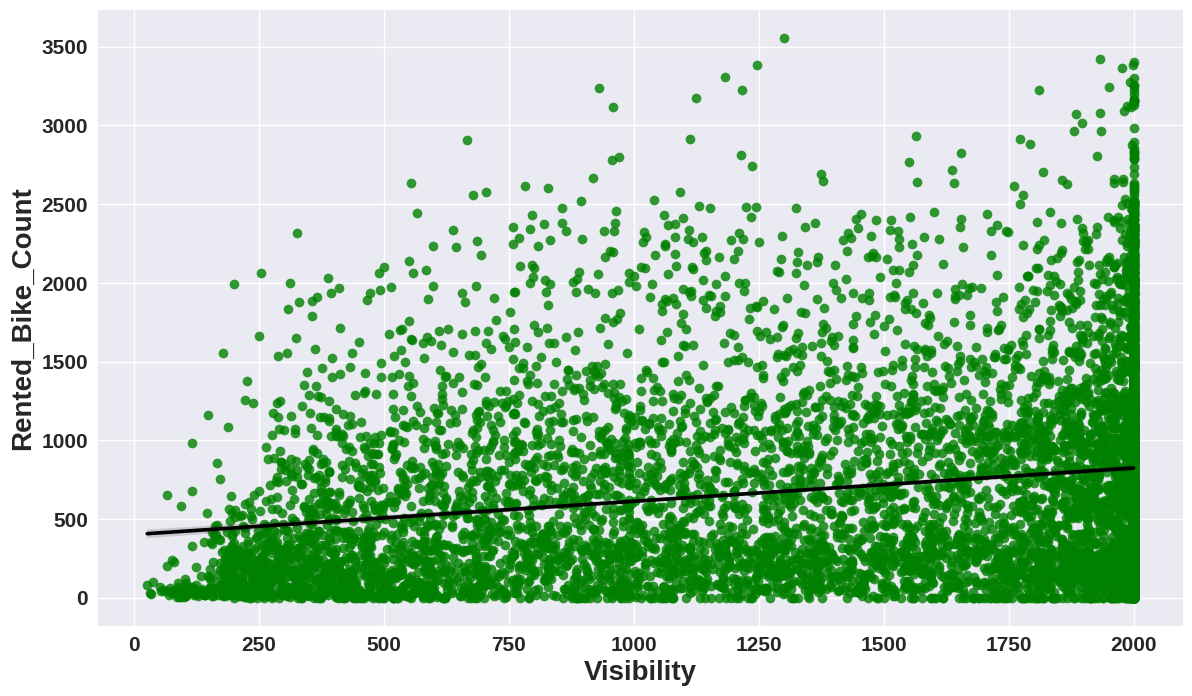

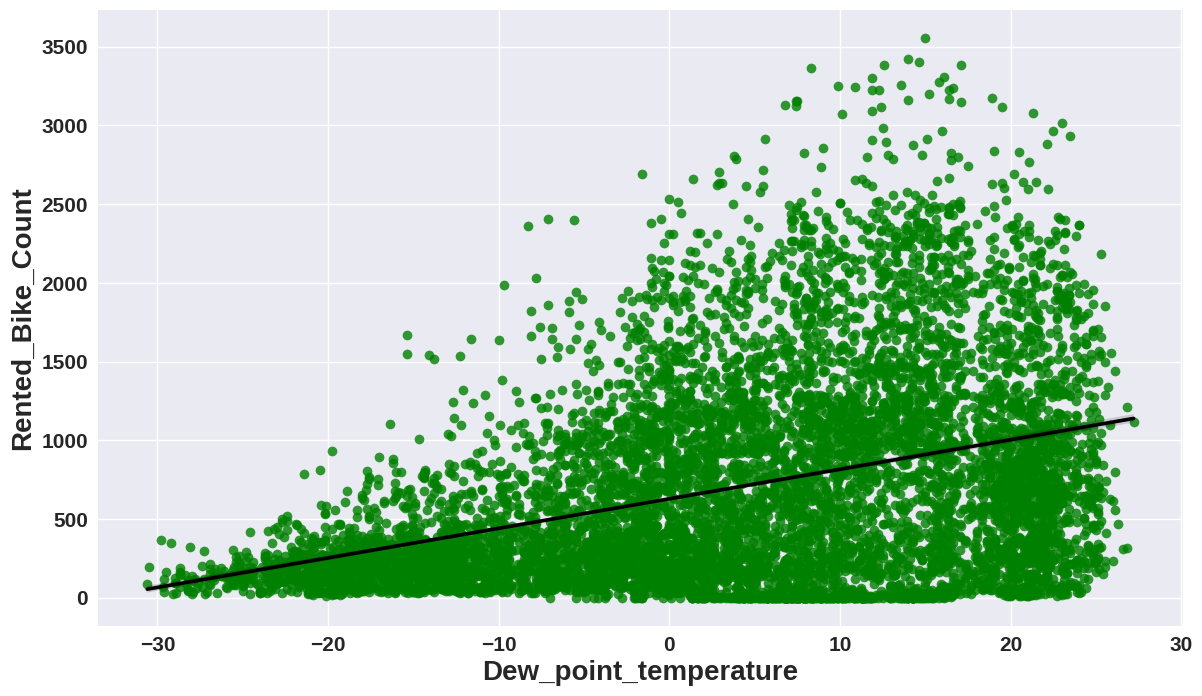

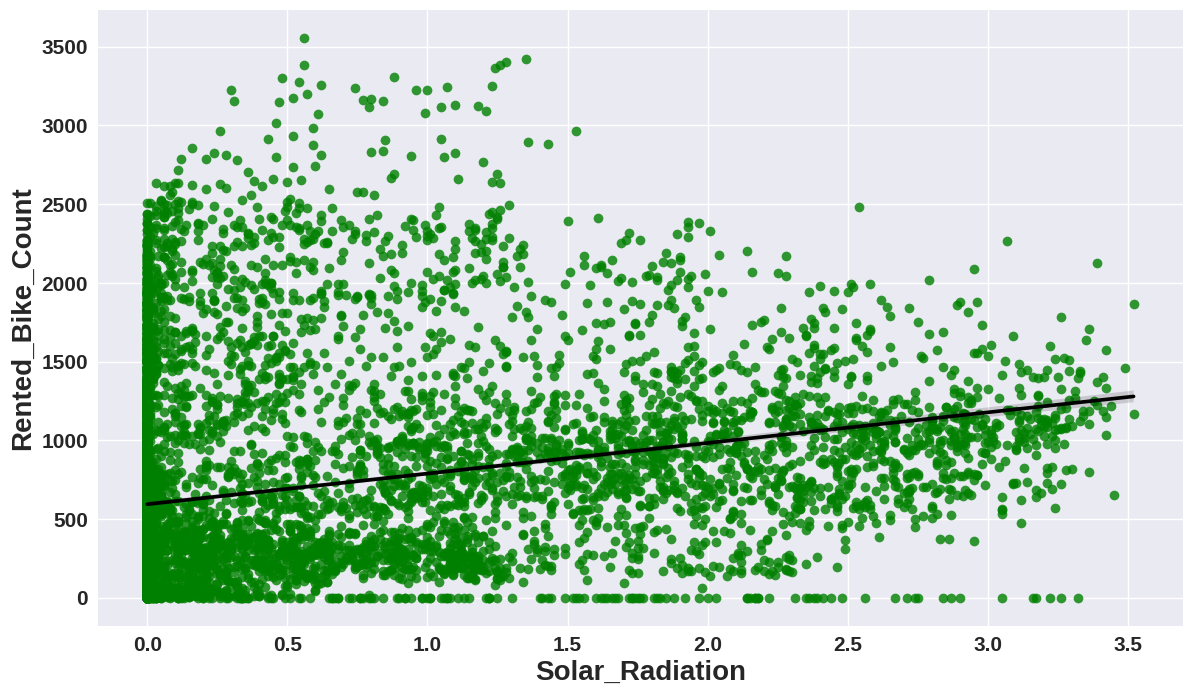

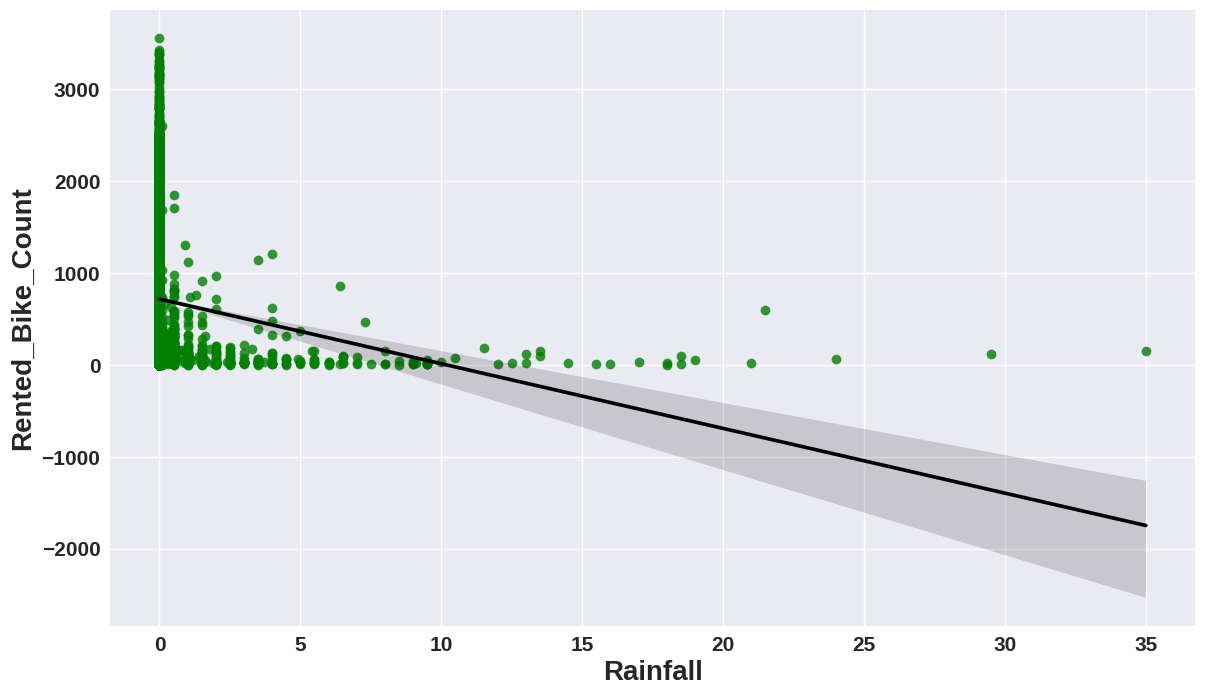

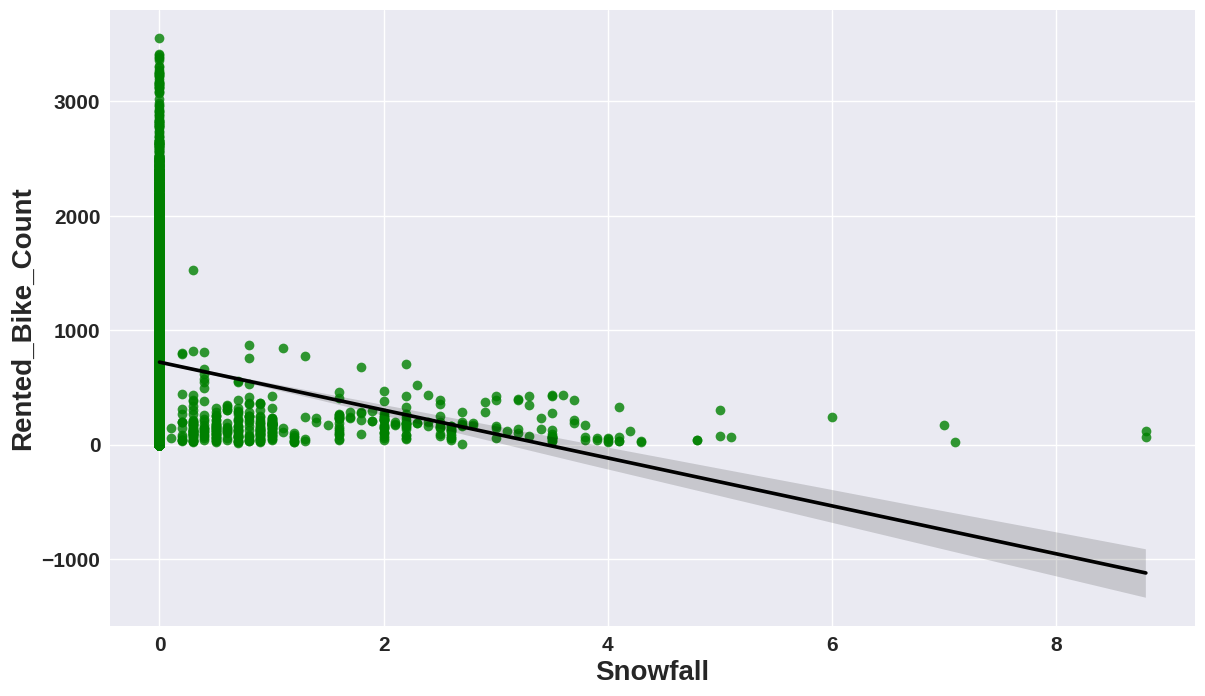

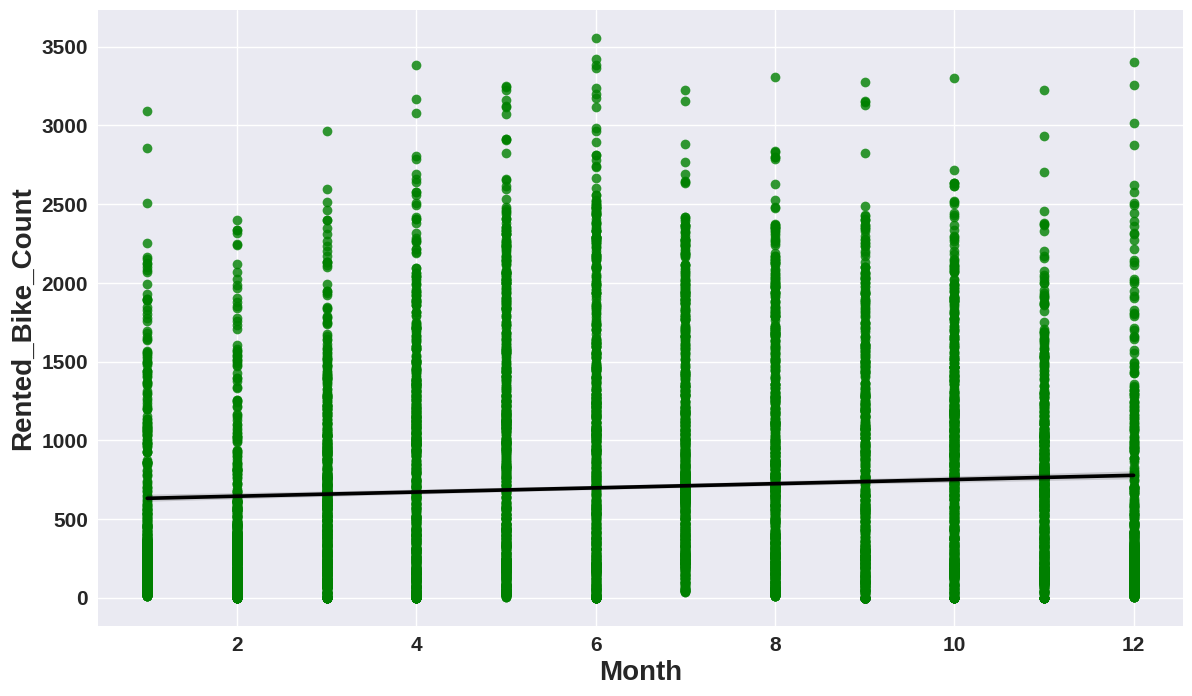

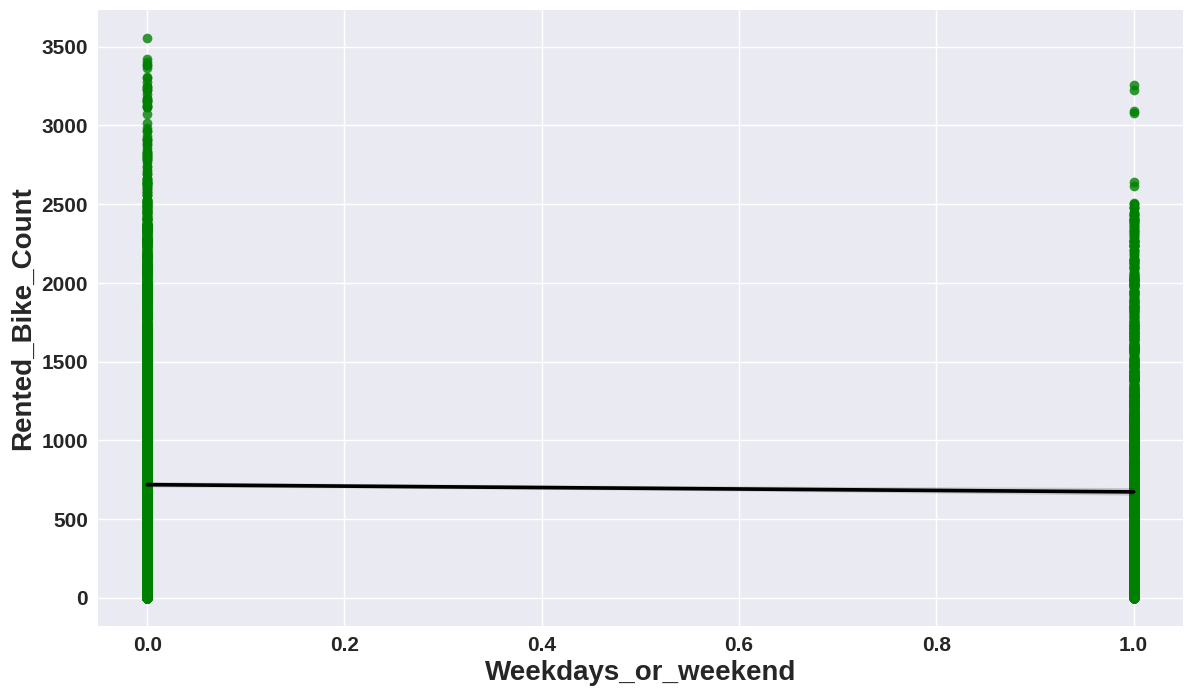

In [32]:
#Examine the correlation between the "Rented Bike Count" (dependent variable) and the other columns (independent variables).
for col in numeric_col:
  plt.figure(figsize=(14,8))
  ax=fig.gca()
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={'color':'green'},line_kws={'color':'black'})


**Hour**: Between 6/7AM to 10AM, there's a noticeable surge, likely due to office-goers, college students, and others heading out. Another significant increase can be observed from 10AM to 7PM, possibly as these individuals conclude their day. In summary, from 7AM to 7PM, bike rental demand remains high, while it tends to decrease between 7PM to 7AM.

**Temperature**: When the temperature drops below 0°C, the number of bike rentals significantly decreases, possibly because people prefer not to ride bikes in such cold conditions. However, during milder temperatures, bike rental counts are notably high.

**humidity**:Here its seems like humidty is inversely proportional to bike rent count. As humdity percentage is increasing there is decrease in bike rent count.

**Wind Speed:**Bike rental counts are good up to a wind speed of 4 m/s.

**Visibility**: It's clear that as visibility improves, the number of bike rentals also rises. Few would choose to ride under poor visibility conditions.

**Dew Point Temperature**: It seems that as the dew point temperature drops below 0°C, there is a decrease in bike rental activity. This observation suggests that there may be strong collinearity between the Dew Point temperature and the Temperature columns.








**Solar radiation**: Here the amount of rented bikes is huge, when there is solar radiation.

**Rainfall And snowfall**: It's evident that most people prefer not to ride bikes in rain or snowfall.

# **Correlation**:
Relationship between dependant and indenpendant veriable.

<Axes: >

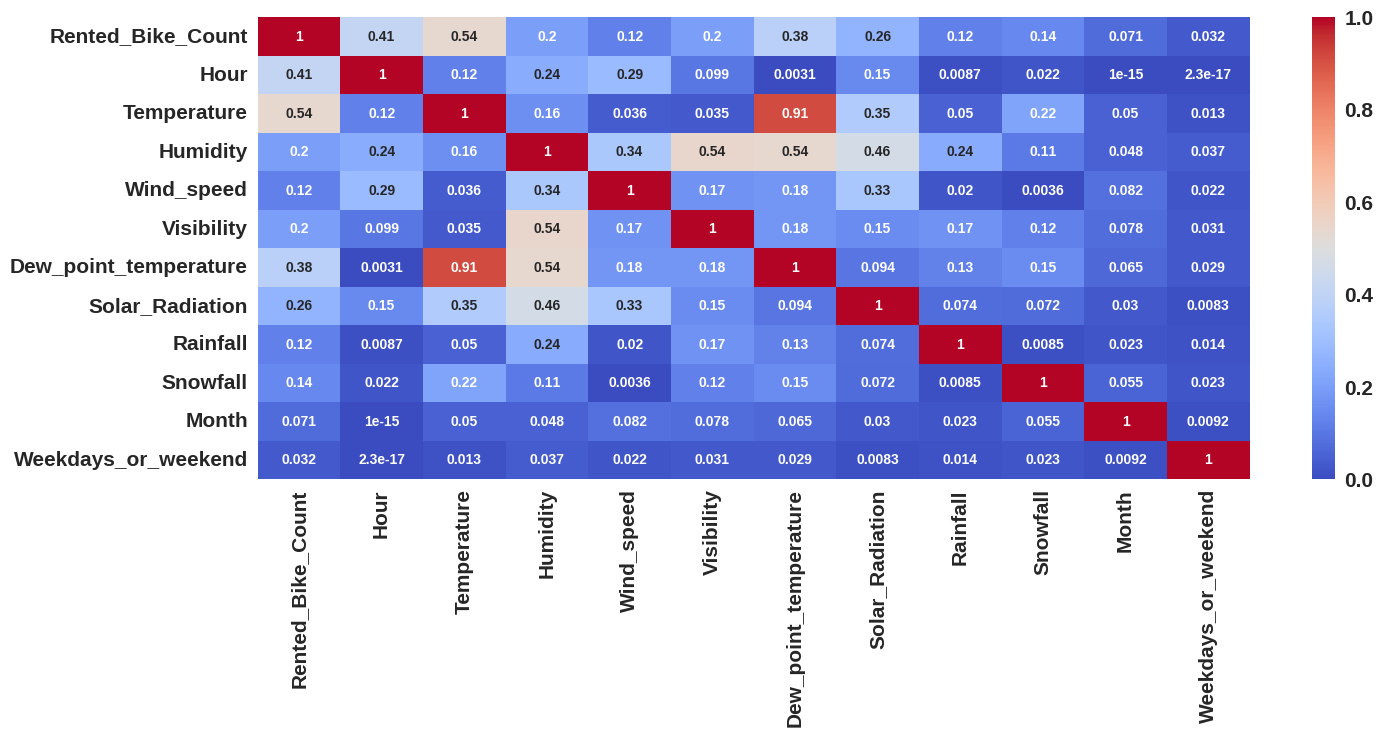

In [33]:
plt.figure(figsize=(16,6))
corr=bike_df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

The temperatures of both "Temperature" and "Dew Point Temperature" show a strong correlation. Adhering to the regression principles, multicollinearity among independent variables should be avoided. From the heatmap, the high correlation between "Temperature" and "Dew Point Temperature" is evident. Given that the correlation between "Temperature" and our target variable, "Bike Rented Count," is stronger, we'll retain the "Temperature" column and remove the "Dew Point Temperature" column. Additionally, since we've derived features like month, weekdays, and weekends, the "Date" column becomes redundant and can be dropped.

# **Prepare Model:**

In [34]:
df=bike_df.copy()
df.head()


Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  Month  Weekdays_or_weekend  
0  No Holiday             Yes      1                    0  
1  No Holiday             Yes      1                    0  
2  No Holiday             Yes      1                    0  
3  No Holiday             Yes      1                    0  
4  No Holiday             Yes      1                    0

In [35]:
df.drop('Dew_point_temperature',inplace=True,axis=1)

In [36]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [37]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

variables       VIF
0                 Hour  3.961874
1          Temperature  3.236809
2             Humidity  6.114153
3           Wind_speed  4.616621
4           Visibility  5.404128
5      Solar_Radiation  2.272068
6             Rainfall  1.081252
7             Snowfall  1.125304
8                Month  4.580307
9  Weekdays_or_weekend  1.399708

In [38]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

variables       VIF
0                 Hour  3.931193
1          Temperature  2.543847
2           Wind_speed  4.301342
3           Visibility  5.330632
4      Solar_Radiation  1.894468
5             Rainfall  1.045135
6             Snowfall  1.081123
7                Month  3.741610
8  Weekdays_or_weekend  1.375146

In [39]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])


variables       VIF
0                 Hour  3.755736
1          Temperature  2.492225
2           Wind_speed  3.748534
3      Solar_Radiation  1.893823
4             Rainfall  1.030569
5             Snowfall  1.077566
6                Month  3.049391
7  Weekdays_or_weekend  1.350943

In [40]:
# As per above vif calculation dropping humidity and visibility columns.
df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [41]:
# checking categoiries in season column.
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [42]:
# dummy variables
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)


In [43]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [44]:
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})
df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1, 'No':0})

In [45]:
# checking dummy and labled columns
df.head(3)

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
0                254     0         -5.2         2.2              0.0   
1                204     1         -5.5         0.8              0.0   
2                173     2         -6.0         1.0              0.0   

   Rainfall  Snowfall  Holiday  Functioning_Day  Month  Weekdays_or_weekend  \
0       0.0       0.0        0                1      1                    0   
1       0.0       0.0        0                1      1                    0   
2       0.0       0.0        0                1      1                    0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  
0               0               0               1  
1               0               0               1  
2               0               0               1

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Wind_speed           8760 non-null   float64
 4   Solar_Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Holiday              8760 non-null   int64  
 8   Functioning_Day      8760 non-null   int64  
 9   Month                8760 non-null   int64  
 10  Weekdays_or_weekend  8760 non-null   int64  
 11  Seasons_Spring       8760 non-null   uint8  
 12  Seasons_Summer       8760 non-null   uint8  
 13  Seasons_Winter       8760 non-null   uint8  
dtypes: float64(5), int64(6), uint8(3)
memory usage: 778.6 KB


# **Linear Regression Model**

In [47]:
#import train test split model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


In [48]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=df.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(df['Rented_Bike_Count'])

In [49]:
# Split data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)


In [51]:
# shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(6132, 13)
(6132,)
(2628, 13)
(2628,)


In [52]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)


LinearRegression()

In [53]:
LinearRegression()


LinearRegression()

In [54]:
l_reg.coef_

array([ 13.03412526,  24.3956317 ,   3.35825273,   3.43510298,
       -71.13971093, -10.4763411 ,  -3.00551186,  28.47981875,
         1.05521935,  -0.58930031,  -2.93262797,  -3.58223659,
        -6.45886182])

In [55]:
#checking dataframe for coefficent and X column
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

Coefficient
Hour                   13.034125
Temperature            24.395632
Wind_speed              3.358253
Solar_Radiation         3.435103
Rainfall              -71.139711
Snowfall              -10.476341
Holiday                -3.005512
Functioning_Day        28.479819
Month                   1.055219
Weekdays_or_weekend    -0.589300
Seasons_Spring         -2.932628
Seasons_Summer         -3.582237
Seasons_Winter         -6.458862

In [56]:
#intercept
l_reg.intercept_

-21.477053440248188

In [57]:
#score
l_reg.score(X_train,y_train)

0.6123528085603556

In [58]:
# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

# y predictions on test data
y_pred=l_reg.predict(X_test)

* **Calculation on training data set**

In [59]:
#Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

The Mean Absolute Error (MAE) is 5.8555397241788345.


In [60]:
#Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

The Mean Squred Error(MSE) is 60.29949292444555.


In [61]:
#Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

The Root Mean Squared Error(RMSE) is 7.765274813195316.


In [62]:
#R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The R2 Score is 0.6123528085603556.


In [63]:
#creating set of training dataset
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8555  60.2995  7.7653    0.6124

* **Calculation on test data set**

In [64]:
#Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

 The Mean Absolute Error (MAE) is 5.834169822951746.


In [65]:
#Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

 The Mean Squred Error(MSE) is 58.624247223024895.


In [66]:
#Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

The Root Mean Squared Error(RMSE) is 7.656647257319936.


In [67]:
#R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

The R2 Score is 0.618326967365199.


In [68]:
#creating set of test dataset
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
# create test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8342  58.6242  7.6566    0.6183

* The R2 score for the testing data is 0.6183, which closely aligns with the score from the training data. This suggests that our model performs consistently and does not exhibit overfitting. However, there's still room to enhance the model's performance.

In [69]:
# Define a function to visualize both predicted and actual y values on a graph.
def plot_Pred_vs_actual(y_pred,y_test):
  ''' predicted values with actaul values'''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()


In [70]:
# Define a function to create a scatter plot comparing y_test and y_actual values.
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")


In [71]:
# The residuals from the regression follow a normal distribution. Homoscedasticity pertains to the equal distribution of these residuals.
 #The average of the residuals should be close to zero to confirm that our line is truly the best fit for the data.
def Residual_distPlot(y_pred,y_test):
  '''Checks the distribution of residals)'''

  plt.figure(figsize=(10,5))
  sns.distplot(x=y_test-y_pred)

  plt.title("Residual Distribution")



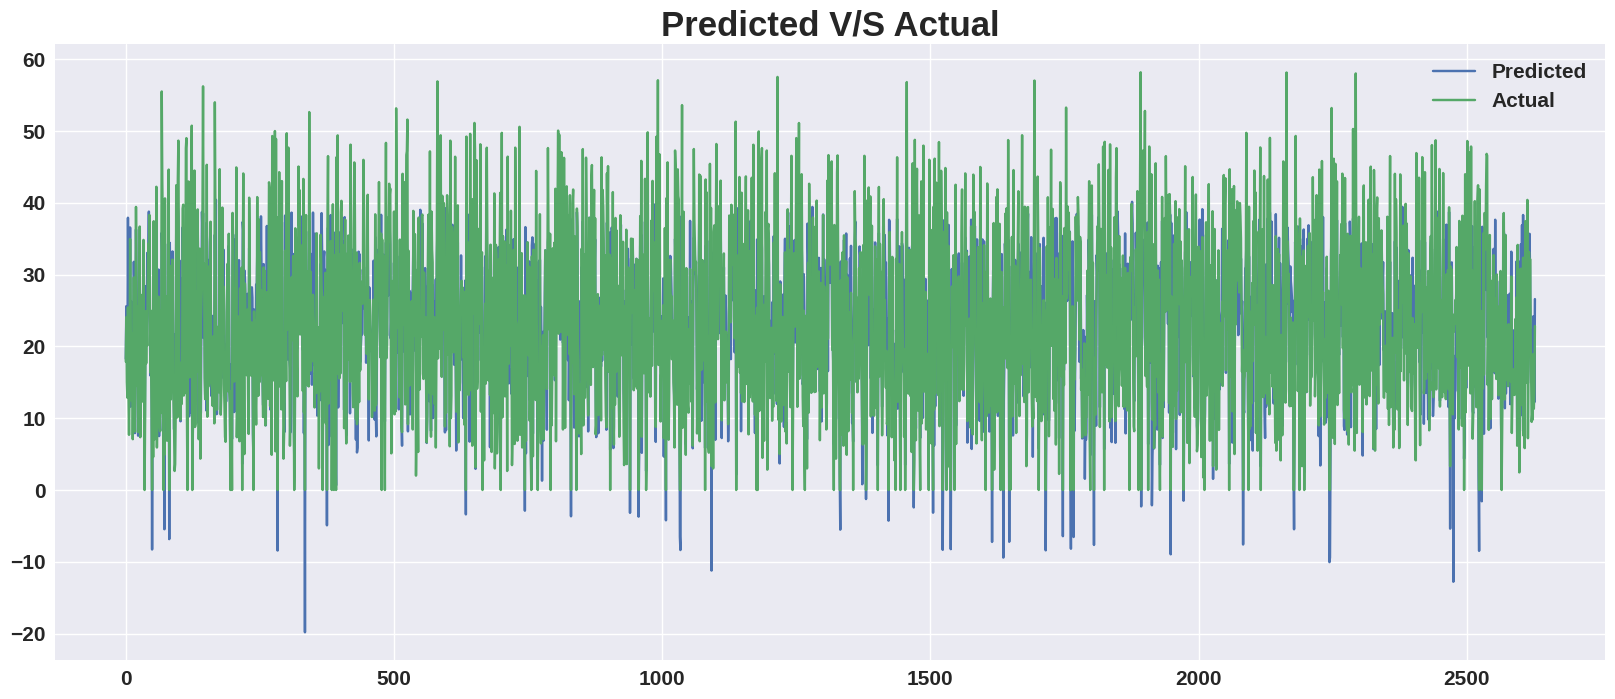

In [72]:
#plotting
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

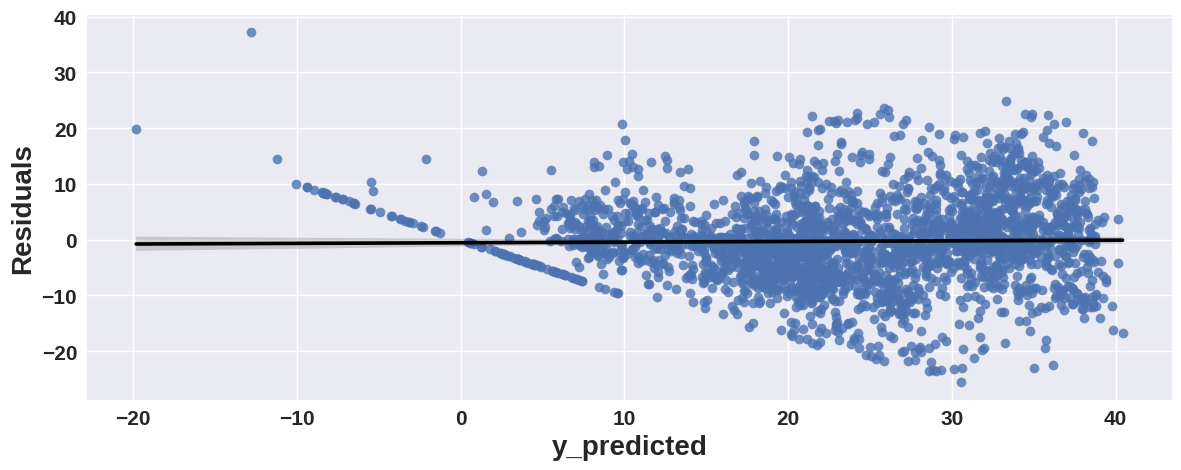

In [73]:
#Homoscedasticity
plt.figure(figsize=(14,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

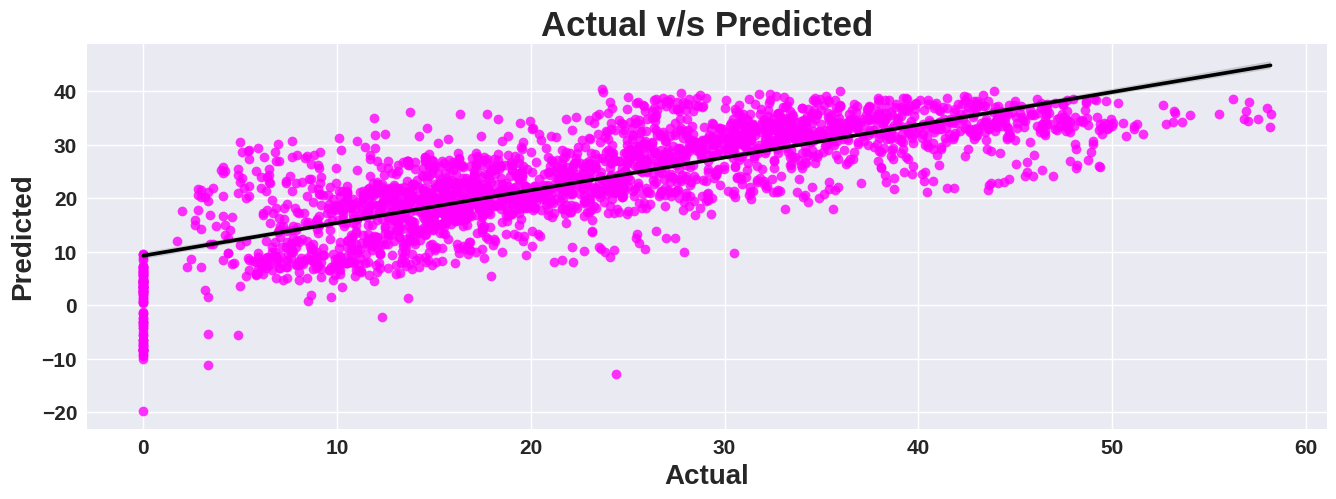

In [74]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

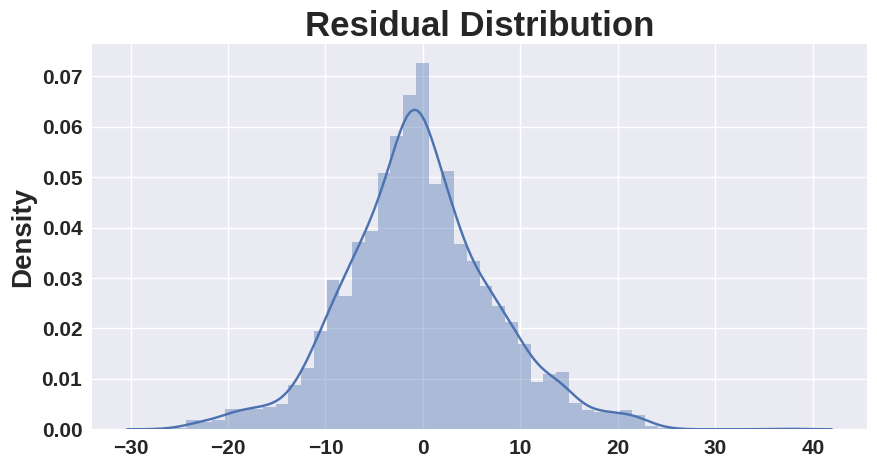

In [75]:
Residual_distPlot(y_pred,y_test)

**LASSO REGRESSION**

In [76]:
lasso_reg=Lasso(alpha=0.01)
# Fitting and training the model
lasso_reg.fit(X_train,y_train)


Lasso(alpha=0.01)

In [77]:
#coefficient
lasso_reg.coef_

array([ 13.06618706,  23.53689635,   2.7511264 ,   3.64259929,
       -61.65707559,  -6.14969513,  -2.72395881,  27.99198566,
         0.97614536,  -0.51631491,  -2.73325777,  -3.18707888,
        -6.55141403])

In [78]:
# get dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})

X  Coeficients
0                  Hour    13.066187
1           Temperature    23.536896
2            Wind_speed     2.751126
3       Solar_Radiation     3.642599
4              Rainfall   -61.657076
5              Snowfall    -6.149695
6               Holiday    -2.723959
7       Functioning_Day    27.991986
8                 Month     0.976145
9   Weekdays_or_weekend    -0.516315
10       Seasons_Spring    -2.733258
11       Seasons_Summer    -3.187079
12       Seasons_Winter    -6.551414

In [79]:
#train dataset score
lasso_reg.score(X_train,y_train)

0.6112950857219155

In [80]:
#test dataset score
lasso_reg.score(X_test,y_test)

0.61723035952942

In [81]:
#intercept
lasso_reg.intercept_

-20.65131177706763

In [82]:
# y prdiction on train data
y_pred_train=lasso_reg.predict(X_train)
# y prdiction on test data
y_pred=lasso_reg.predict(X_test)

* **Calculation On Train Data.**

In [83]:
#Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

The Mean Absolute Error (MAE) is 5.869103531726283.


In [84]:
#Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

The Mean Squred Error(MSE) is 60.46402436494349.


In [85]:
#Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")


The Root Mean Squared Error(RMSE) is 7.775861647749624.


In [86]:
#R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The R2 Score is 0.6112950857219155.


In [87]:
# Create train results dictionary
train_dict={'Model':"Lasoo",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8555  60.2995  7.7653    0.6124
1              Lasoo  5.8691  60.4640  7.7759    0.6113

* **Calculation On Test Data.**

In [88]:
# Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

 The Mean Absolute Error (MAE) is 5.850566426263689.


In [89]:
#  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")


 The Mean Squred Error(MSE) is 58.792684087499225.


In [90]:
# Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")


The Root Mean Squared Error(RMSE) is 7.667638755673042.


In [91]:
# R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

The R2 Score is 0.61723035952942.


In [92]:
# Create test results dictionary
test_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8342  58.6242  7.6566    0.6183
1              Lasso  5.8506  58.7927  7.6676    0.6172

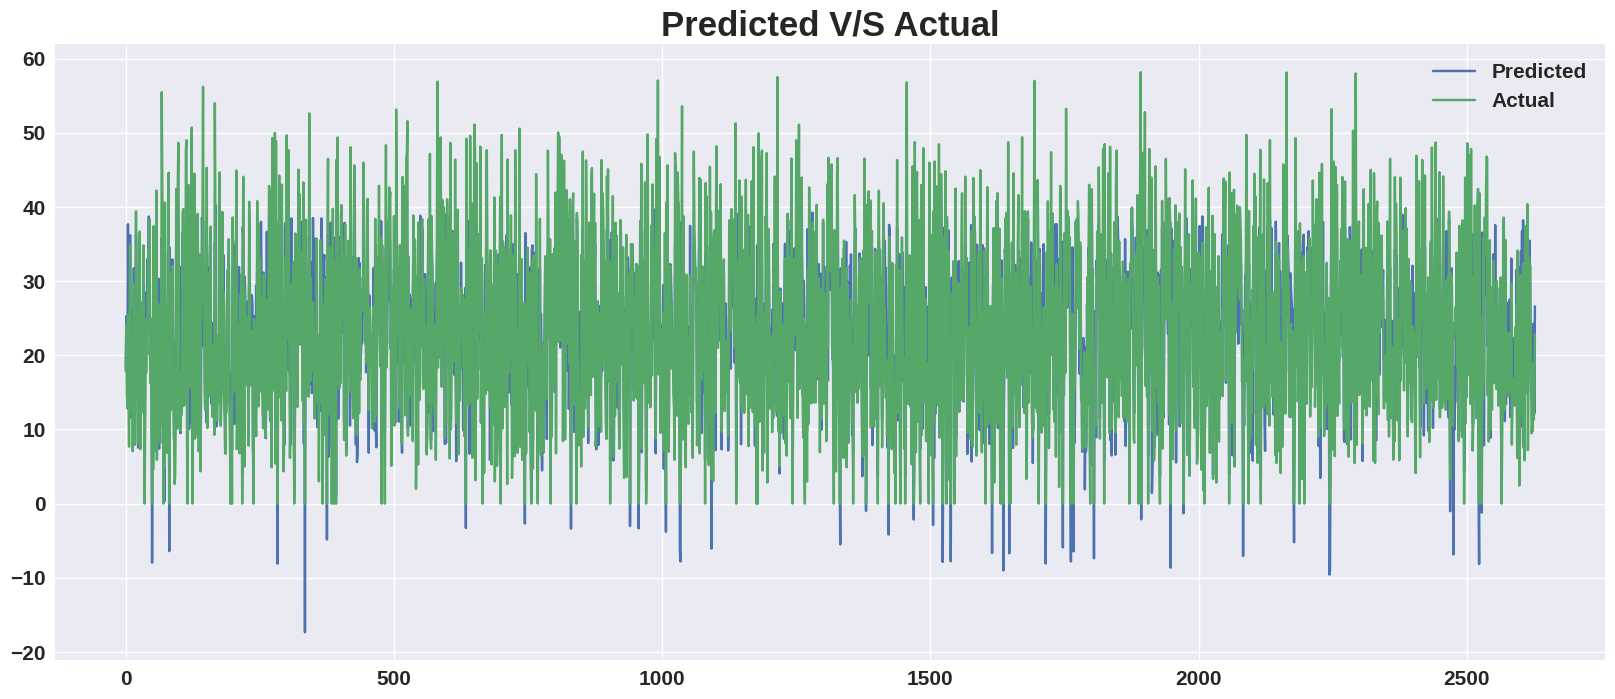

In [93]:
plot_Pred_vs_actual(y_pred,y_test)


Text(0.5, 0, 'y_predicted')

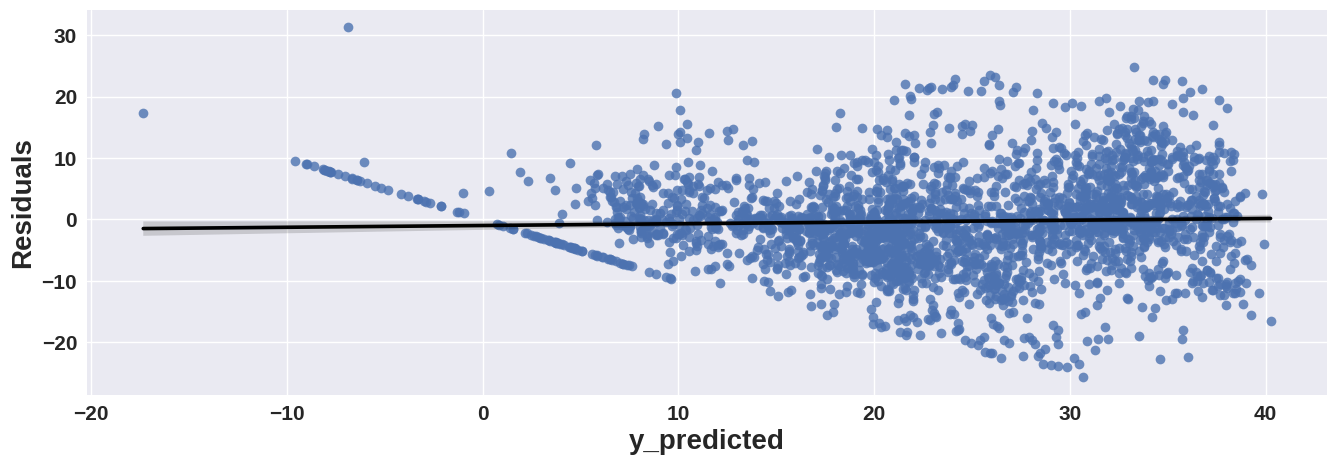

In [94]:
# Homoscedasticity
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

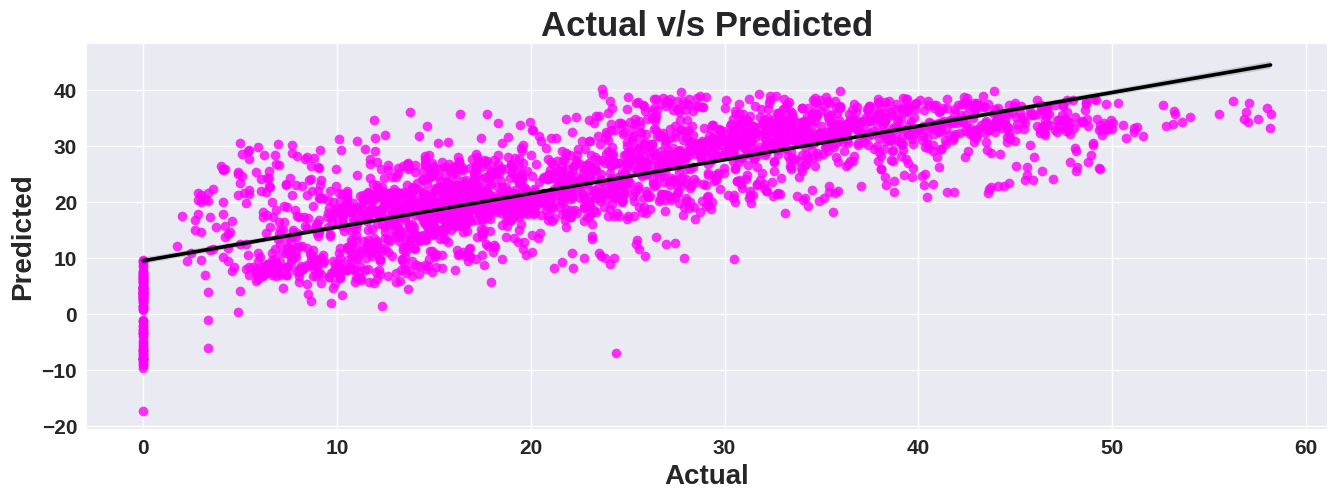

In [95]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

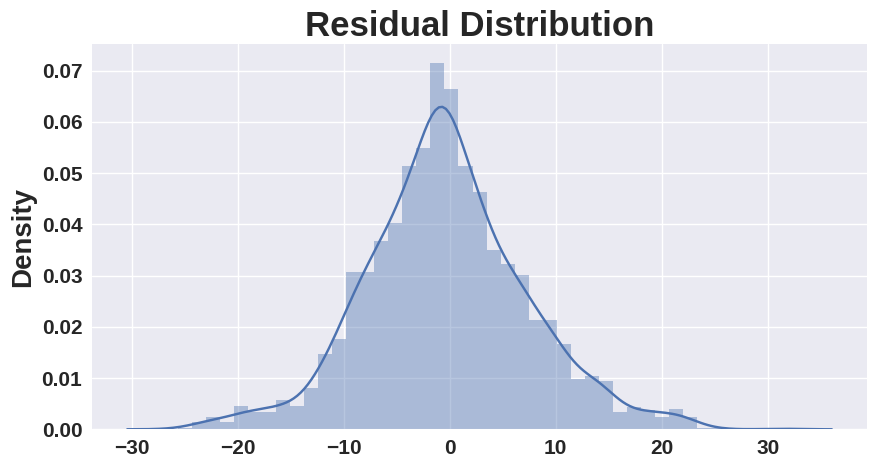

In [96]:
# Residuals of the regression are normally distributed.
Residual_distPlot(y_pred,y_test)

* **RIDGE REGRESSION**

In [97]:
ridge_lg=Ridge(alpha=0.1)
# fit and train
ridge_lg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [98]:
#coefficient
ridge_lg.coef_

array([ 13.03371786,  24.34582856,   3.34949793,   3.4576116 ,
       -70.04499364, -10.41205151,  -3.00303898,  28.46135581,
         1.05691503,  -0.58736967,  -2.9327985 ,  -3.57190574,
        -6.46665547])

In [99]:
# get dataframe for x columns and coeff
pd.DataFrame(ridge_lg.coef_,X.columns,columns=['Coefficients'])

Coefficients
Hour                    13.033718
Temperature             24.345829
Wind_speed               3.349498
Solar_Radiation          3.457612
Rainfall               -70.044994
Snowfall               -10.412052
Holiday                 -3.003039
Functioning_Day         28.461356
Month                    1.056915
Weekdays_or_weekend     -0.587370
Seasons_Spring          -2.932799
Seasons_Summer          -3.571906
Seasons_Winter          -6.466655

In [100]:
#intercept
ridge_lg.intercept_

-21.44118629409719

In [101]:
# y predictions on training dataset
y_pred_train_ridge=ridge_lg.predict(X_train)
# y predictions on test dataset
y_pred_ridge=ridge_lg.predict(X_test)

* **Calculation On Train Data.**

In [102]:
# Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

The Mean Absolute Error (MAE) is 5.869103531726283.


In [103]:
#Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

The Mean Squred Error(MSE) is 60.46402436494349.


In [104]:
#Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

The Root Mean Squared Error(RMSE) is 7.775861647749624.


In [105]:
#R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The R2 Score is 0.6112950857219155.


In [106]:
train_dict={'Model':"Ridge GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df


Model     MAE      MSE    RMSE  R2_score
0   Linear Regression  5.8555  60.2995  7.7653    0.6124
1               Lasoo  5.8691  60.4640  7.7759    0.6113
2  Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113

* **Calculation On Test Data.**

In [107]:
# Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

# Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

# R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.


In [108]:
test_dict={'Model':"Ridge(GridsearchCv Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0           Linear Regression  5.8342  58.6242  7.6566    0.6183
1                       Lasso  5.8506  58.7927  7.6676    0.6172
2  Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172

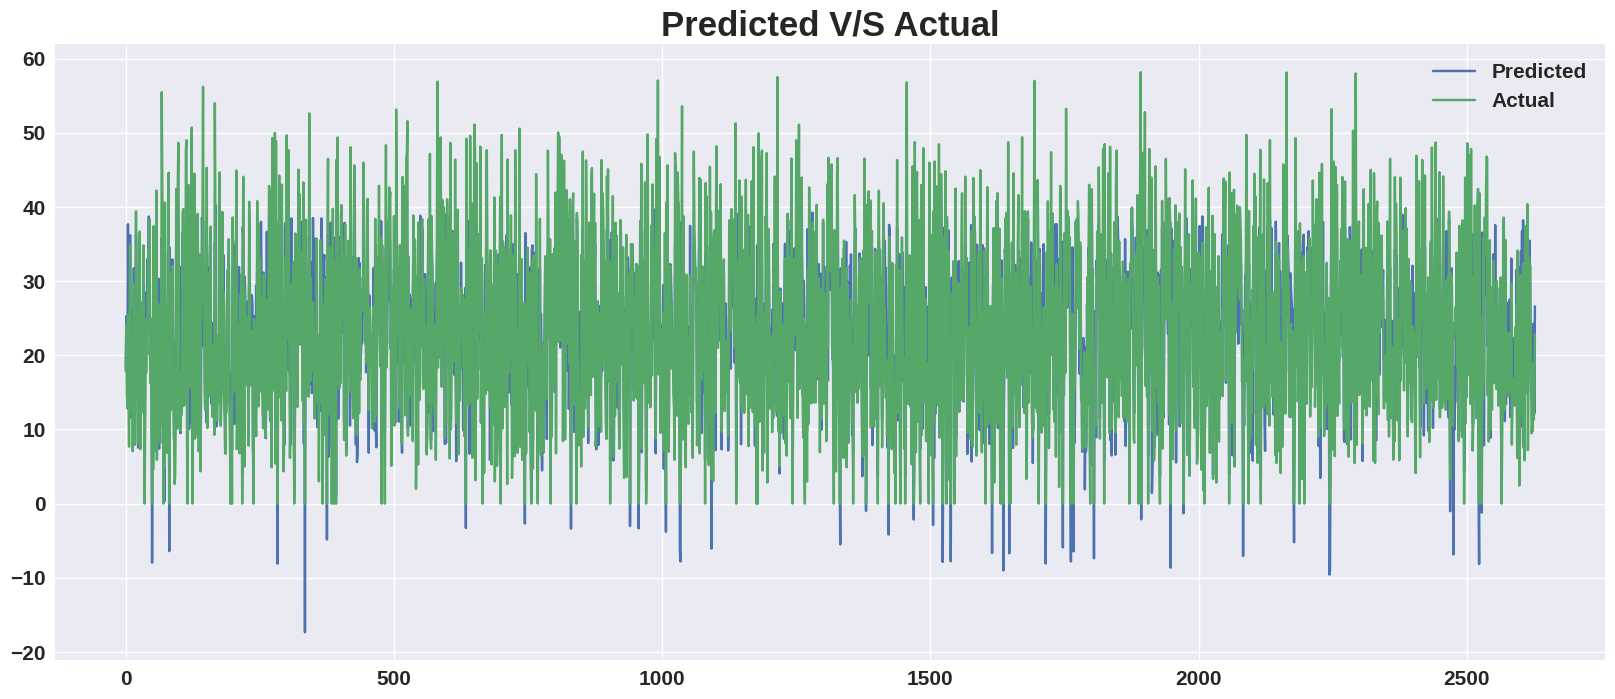

In [109]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

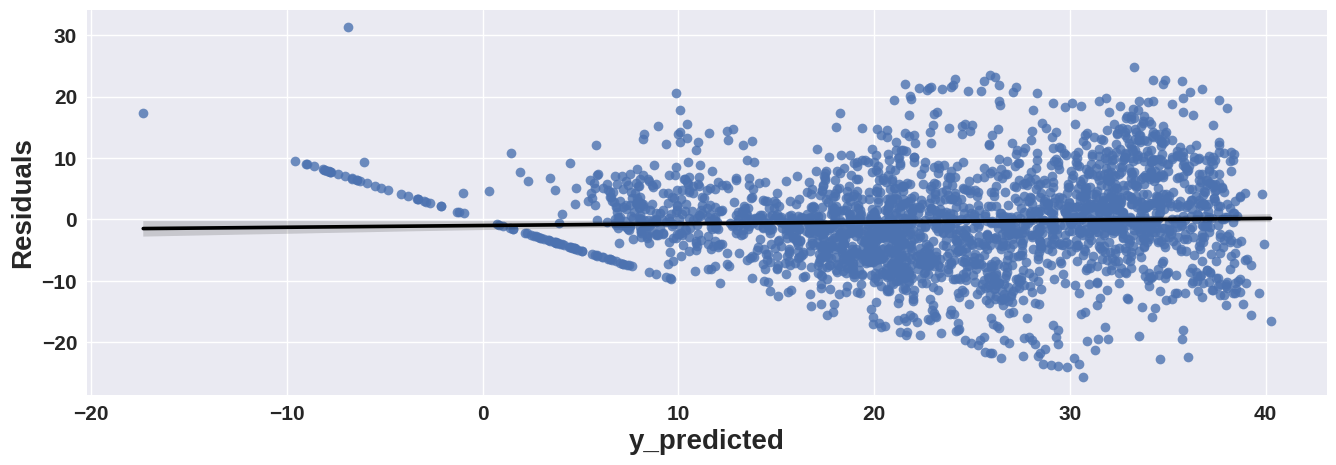

In [110]:
#Homoscedasticity
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

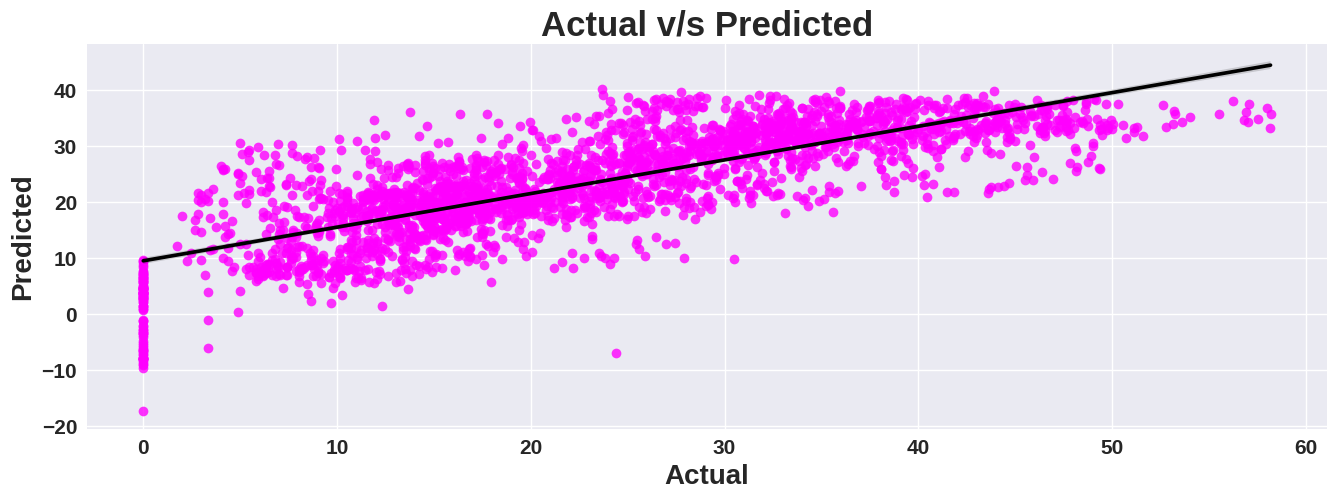

In [111]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

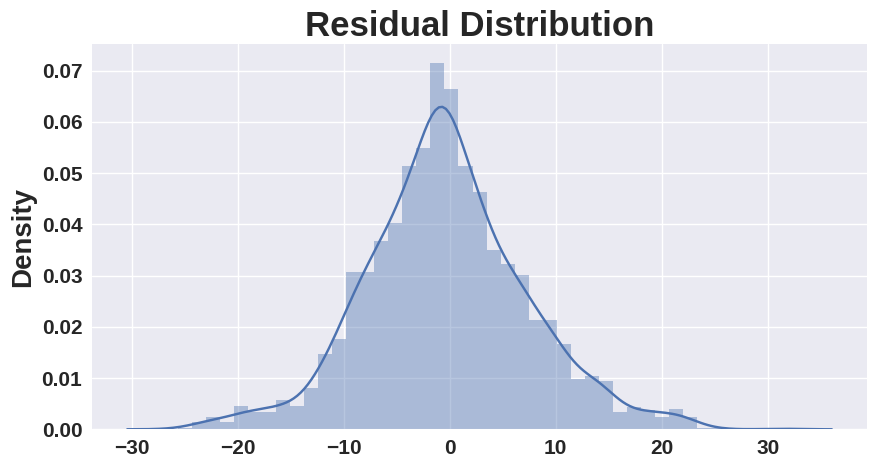

In [112]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

* **GreadSearchCV on Ridge Regression**

In [113]:
from sklearn.model_selection  import GridSearchCV
ridge_reg=Ridge()
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_linear_reg = GridSearchCV(ridge_reg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

The parameter α (alpha) determines the balance between reducing the Residual Sum of Squares (RSS) and shrinking the magnitude of the coefficients. The value of α can vary:

* α = 0:
In this scenario, the objective aligns with that of standard linear regression. The outcome will yield coefficients identical to those of simple linear regression.


* α = ∞:
At this extreme, the coefficients become zero. This is due to the infinite emphasis placed on minimizing the magnitude of the coefficients; anything other than zero would render the objective infinitely large.


* 0 < α < ∞:
For values of α between 0 and infinity, the balance between the two components of the objective is determined by the magnitude of α. The resulting coefficients will be a compromise, ranging between those of simple linear regression and zero.

In [114]:
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')


The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -60.73715246759981


* **ELASTIC NET**

In [115]:
# creating object of elastic net
elastic_net_reg=ElasticNet(alpha=0.001,l1_ratio=0.5)
elastic_net_reg.fit(X_train,y_train)


ElasticNet(alpha=0.001)

In [116]:
#train data
elastic_net_reg.score(X_train,y_train)

0.6084747377362095

In [117]:
# test data
elastic_net_reg.score(X_test,y_test)

0.6139867979293316

In [118]:
# predicting Y train values from train data set
y_pred_train=elastic_net_reg.predict(X_train)
# predicting y values from test data
y_pred=elastic_net_reg.predict(X_test)

In [119]:
# Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

# Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

# R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8932275545714745.
The Mean Squred Error(MSE) is 60.90273656811195.
The Root Mean Squared Error(RMSE) is 7.804020538678249.
The R2 Score is 0.6084747377362095.


In [120]:
train_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                Linear Regression  5.8555  60.2995  7.7653    0.6124
1                            Lasoo  5.8691  60.4640  7.7759    0.6113
2               Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3  ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085

In [121]:
# Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

# Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

# R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.871068266349744.
 The Mean Squred Error(MSE) is 59.2908889405223.
The Root Mean Squared Error(RMSE) is 7.700057723194178.
The R2 Score is 0.6139867979293316.


In [122]:
test_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                Linear Regression  5.8342  58.6242  7.6566    0.6183
1                            Lasso  5.8506  58.7927  7.6676    0.6172
2       Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3  ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140

In [123]:
# Cross validation

elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [124]:
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')


The best alpha value is {'alpha': 0.0001, 'l1_ratio': 0.5}
The best negative mean squred error value is -60.73201342564849


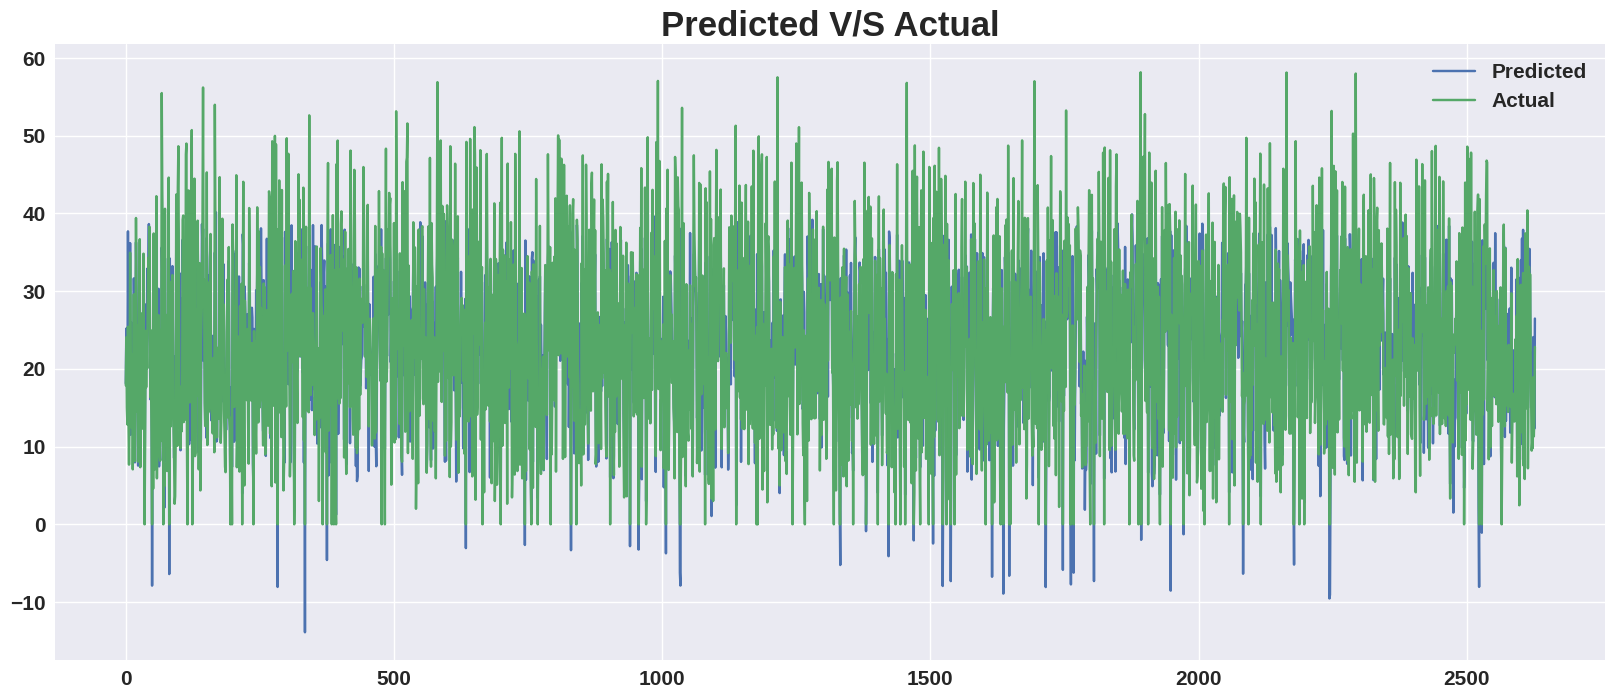

In [125]:
# plotting predicted v/s actual
plot_Pred_vs_actual(y_pred,y_test)


Text(0.5, 0, 'y_predicted')

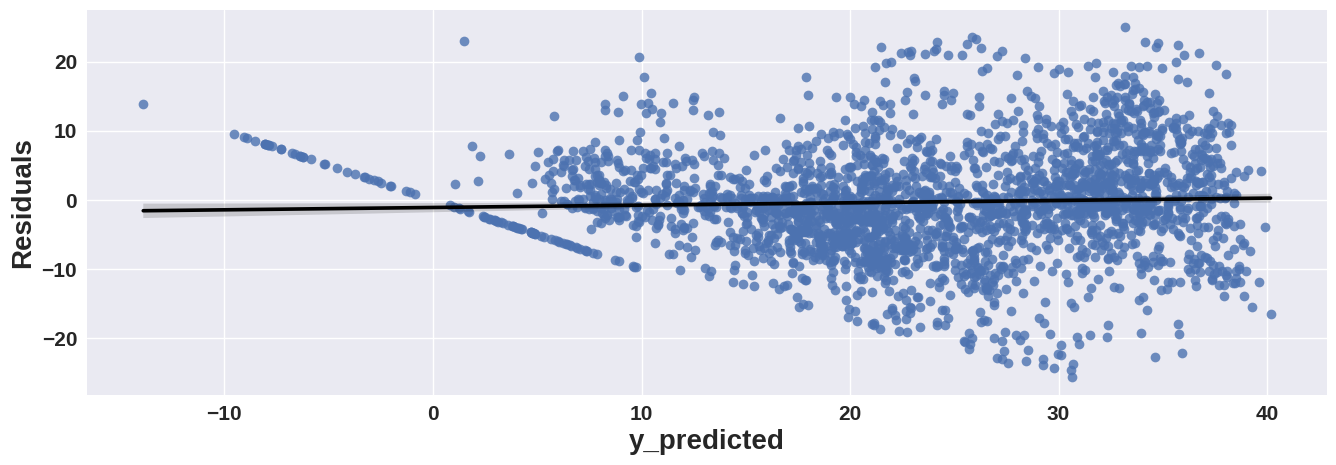

In [126]:
#Homoscedasticity
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

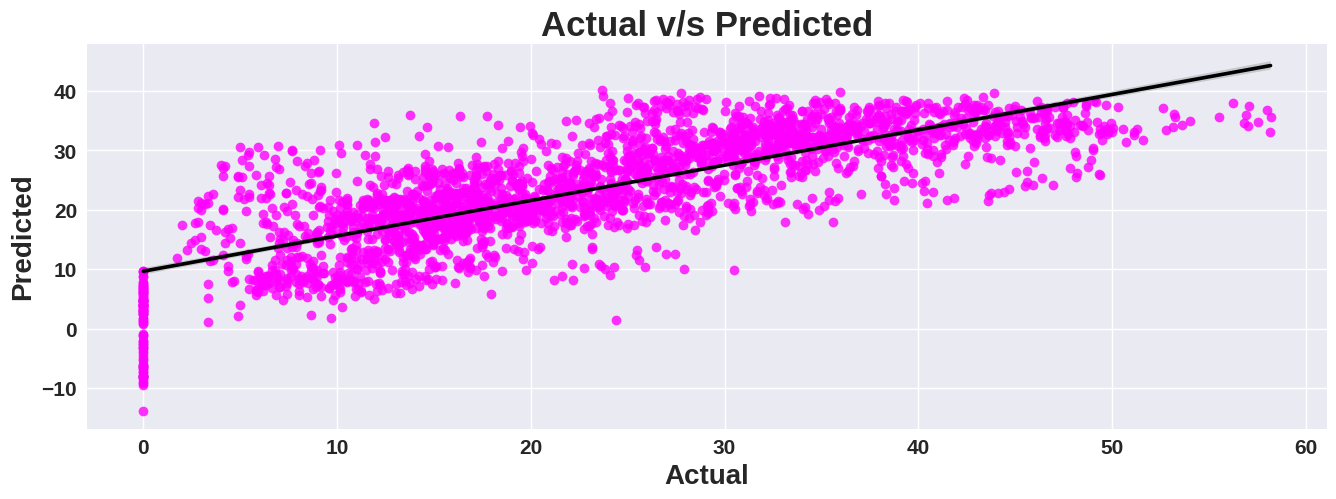

In [127]:
plot_scatter(y_pred,y_test)

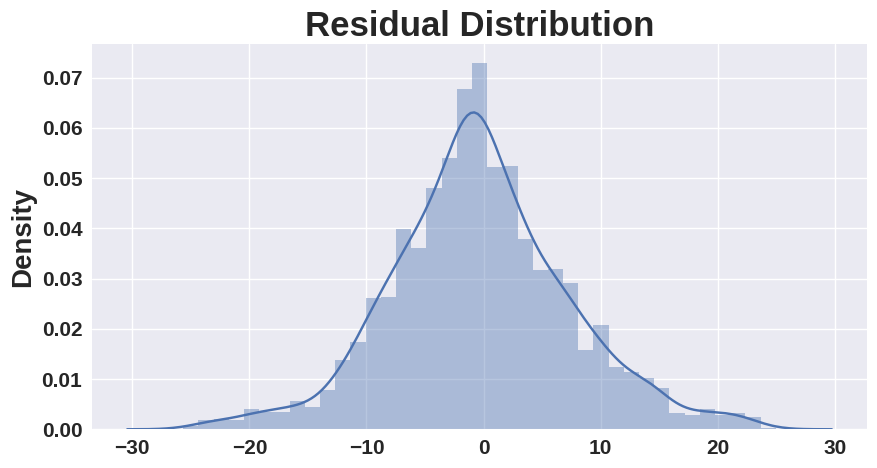

In [128]:
Residual_distPlot(y_pred,y_test)

* **Gradient Boosting Regression**

In [130]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [131]:
gradboo_reg.score(X_train,y_train)

0.86803340650971

In [132]:
gradboo_reg.score(X_test,y_test)

0.858845972488303

In [133]:
y_pred_train=gradboo_reg.predict(X_train)
y_pred=gradboo_reg.predict(X_test)

Calcultion on Train data

In [ ]:

# Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")






In [135]:
#  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

The Mean Squred Error(MSE) is 20.527734615794035.


In [136]:
# Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

The Root Mean Squared Error(RMSE) is 4.530754309802512.


In [137]:
# R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The R2 Score is 0.86803340650971.


In [138]:
train_dict={'Model':"Gardient boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                Linear Regression  5.8555  60.2995  7.7653    0.6124
1                            Lasoo  5.8691  60.4640  7.7759    0.6113
2               Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3  ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4     Gardient boosting Regression  3.1772  20.5277  4.5308    0.8680

calculation on Test data

In [139]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")



 The Mean Absolute Error (MAE) is 3.284139905823052.


In [140]:
#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

 The Mean Squred Error(MSE) is 21.680988432025956.


In [141]:
#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")


The Root Mean Squared Error(RMSE) is 4.656284831496668.


In [142]:
#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

The R2 Score is 0.858845972488303.


In [143]:
test_dict={'Model':"Gradient Boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                Linear Regression  5.8342  58.6242  7.6566    0.6183
1                            Lasso  5.8506  58.7927  7.6676    0.6172
2       Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3  ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4     Gradient Boosting Regression  3.2841  21.6810  4.6563    0.8588

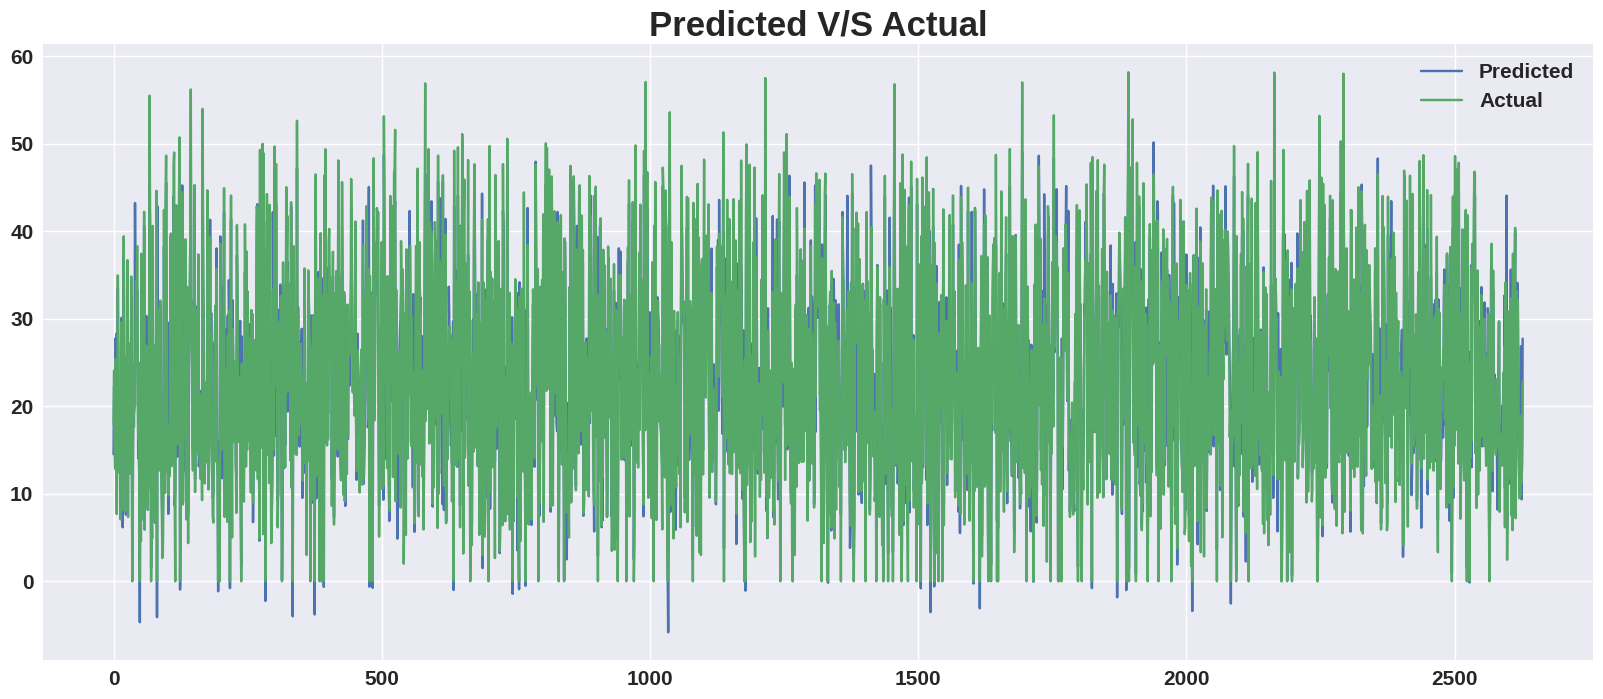

In [144]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

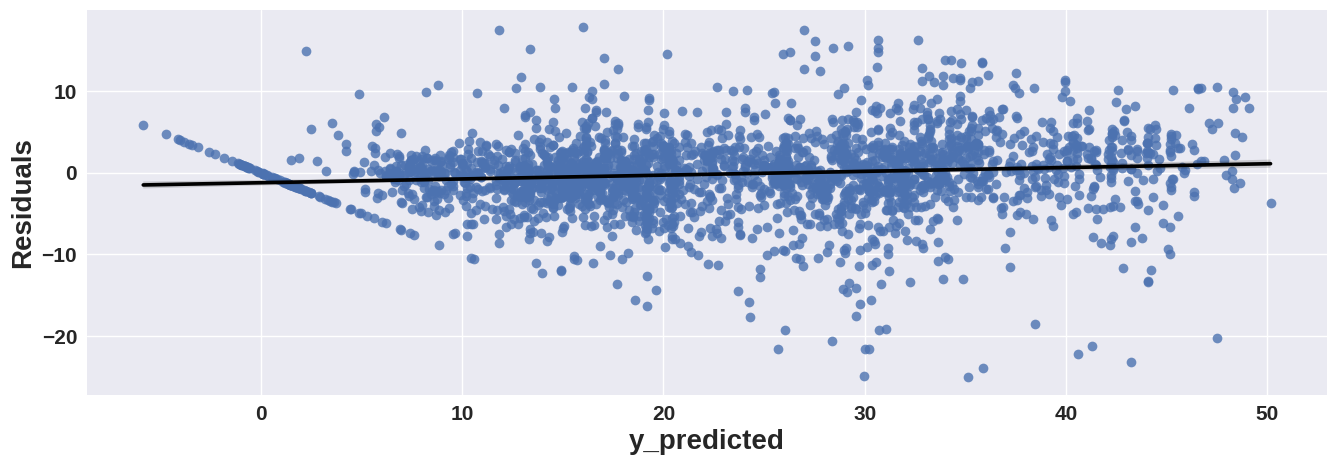

In [145]:
# Check Homoscedasticity
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

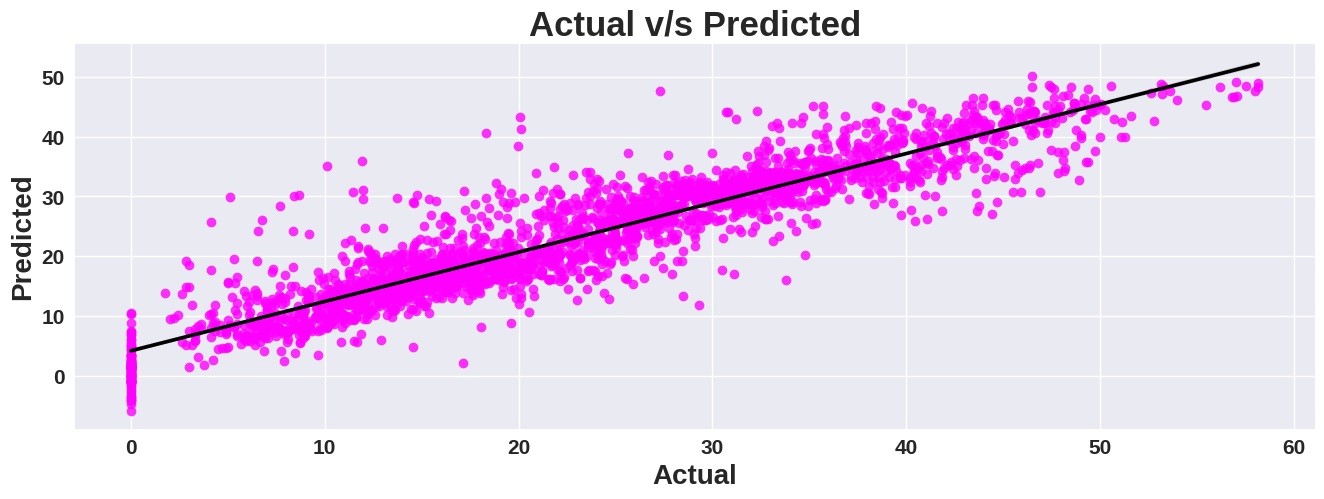

In [146]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

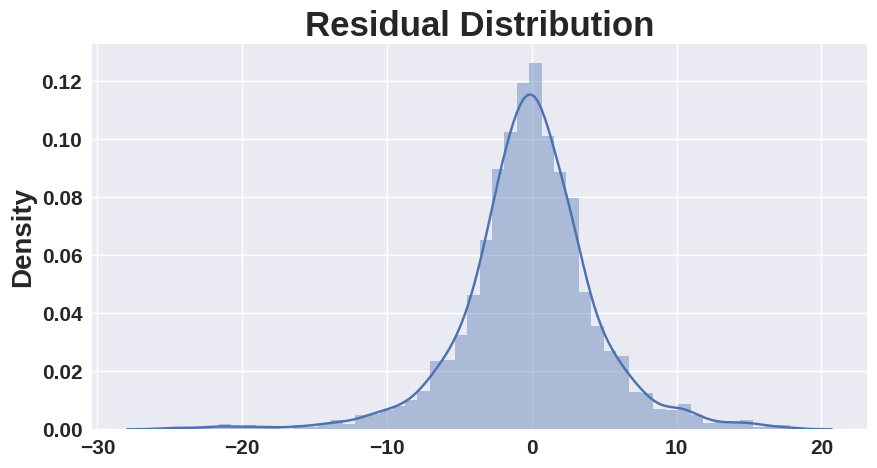

In [147]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)


* **GridSearchCV on Gradient Boosting Regression**


In [150]:
gbr=GradientBoostingRegressor()


In [151]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }

In [154]:
gradboo_tuned=GradientBoostingRegressor(learning_rate=0.04,max_depth=8,n_estimators=150,subsample=0.9)
gradboo_tuned.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=150,
                          subsample=0.9)

In [155]:
 # checking score on train data
gradboo_tuned.score(X_train,y_train)

0.9683589955011543

In [156]:
#checking score on test data
gradboo_tuned.score(X_test,y_test)


0.9128551112812116

In [157]:
#  y preidictions on train data.
y_pred_train=gradboo_tuned.predict(X_train)
# y predictions on test data
y_pred=gradboo_tuned.predict(X_test)

calculation on train data

In [158]:
# Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

# Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

# R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")


The Mean Absolute Error (MAE) is 1.5314728566723665.
The Mean Squred Error(MSE) is 4.9218376117076845.
The Root Mean Squared Error(RMSE) is 2.218521492279866.
The R2 Score is 0.9683589955011543.


Calcultation on test data

In [159]:
# Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

# Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

# R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")


 The Mean Absolute Error (MAE) is 2.387170738003786.
 The Mean Squred Error(MSE) is 13.385288096477971.
The Root Mean Squared Error(RMSE) is 3.6585909987969374.
The R2 Score is 0.9128551112812116.


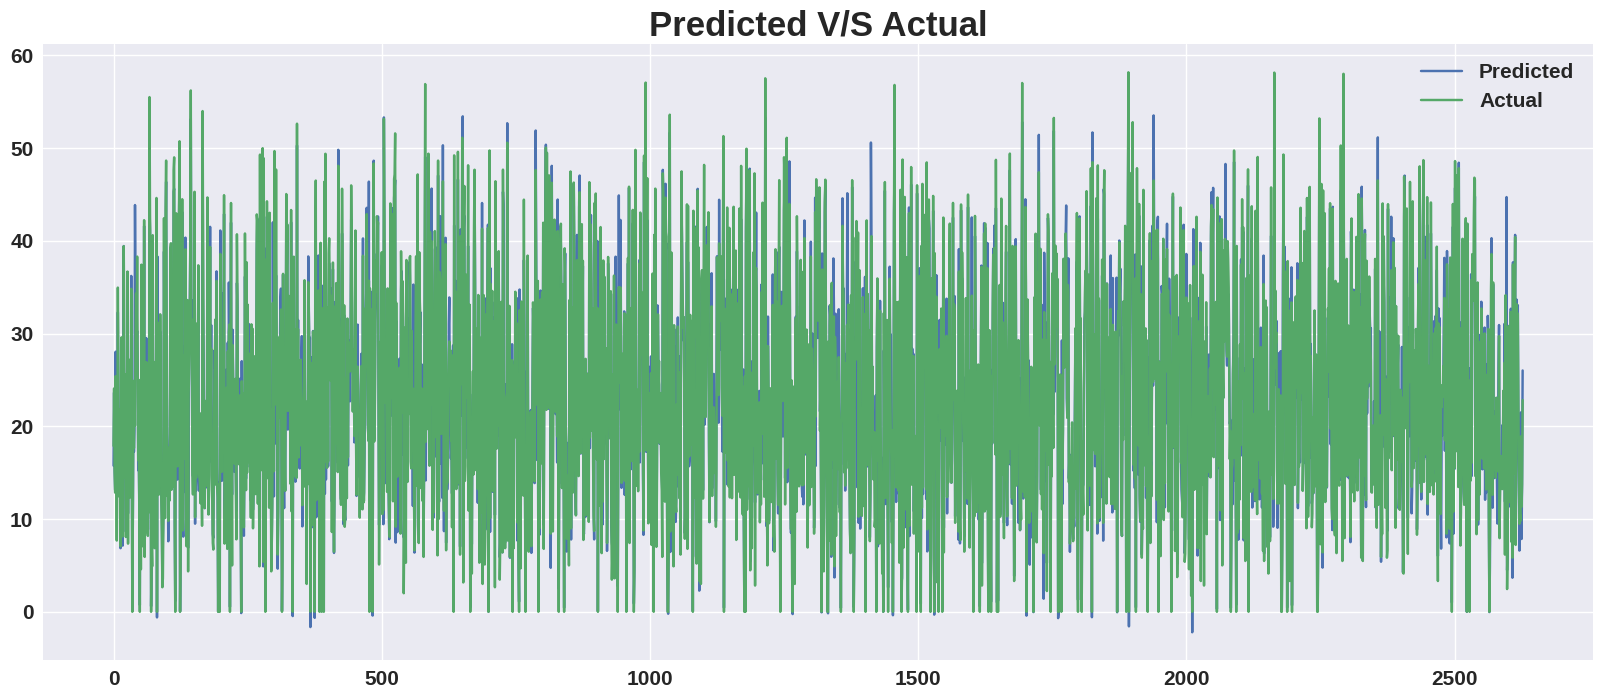

In [160]:
plot_Pred_vs_actual(y_pred,y_test)


Text(0.5, 0, 'y_predicted')

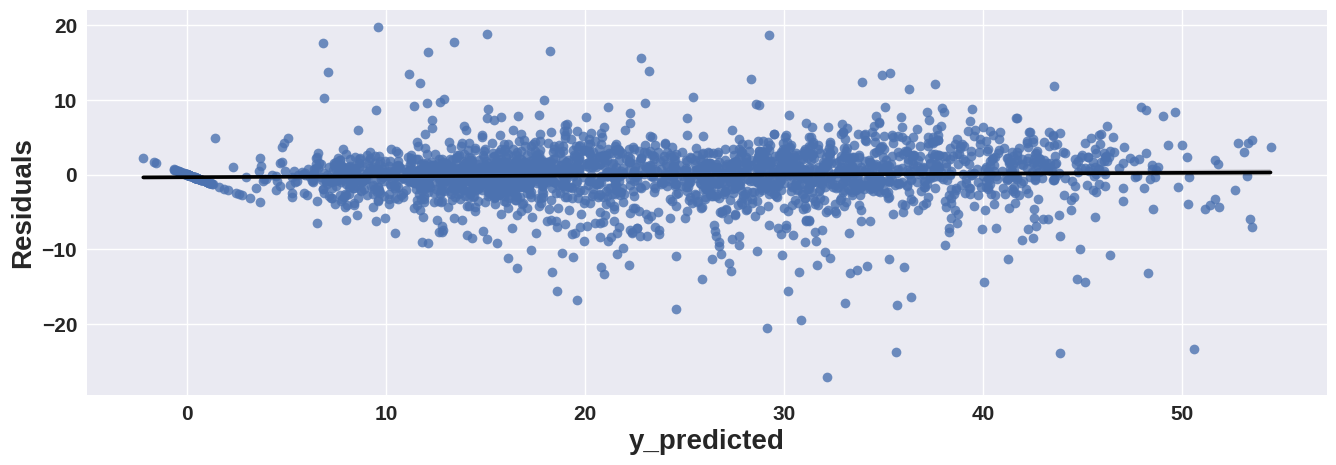

In [161]:
# Check Homoscedasticity
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

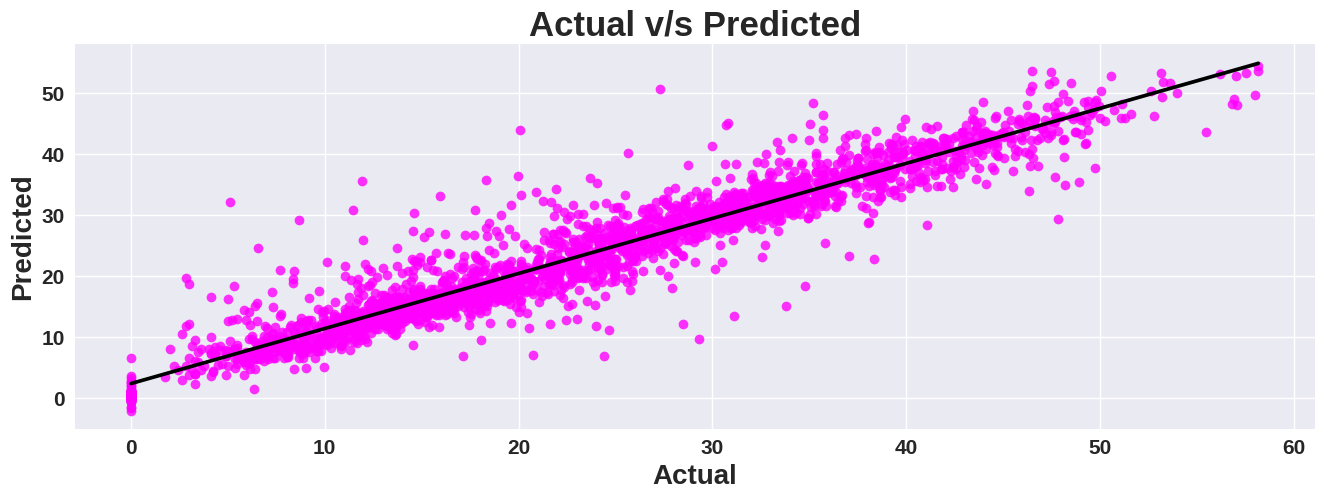

In [162]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

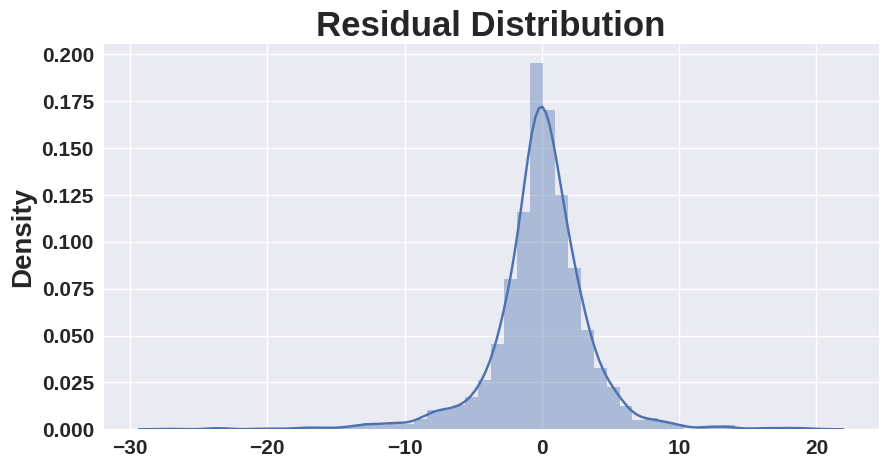

In [163]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

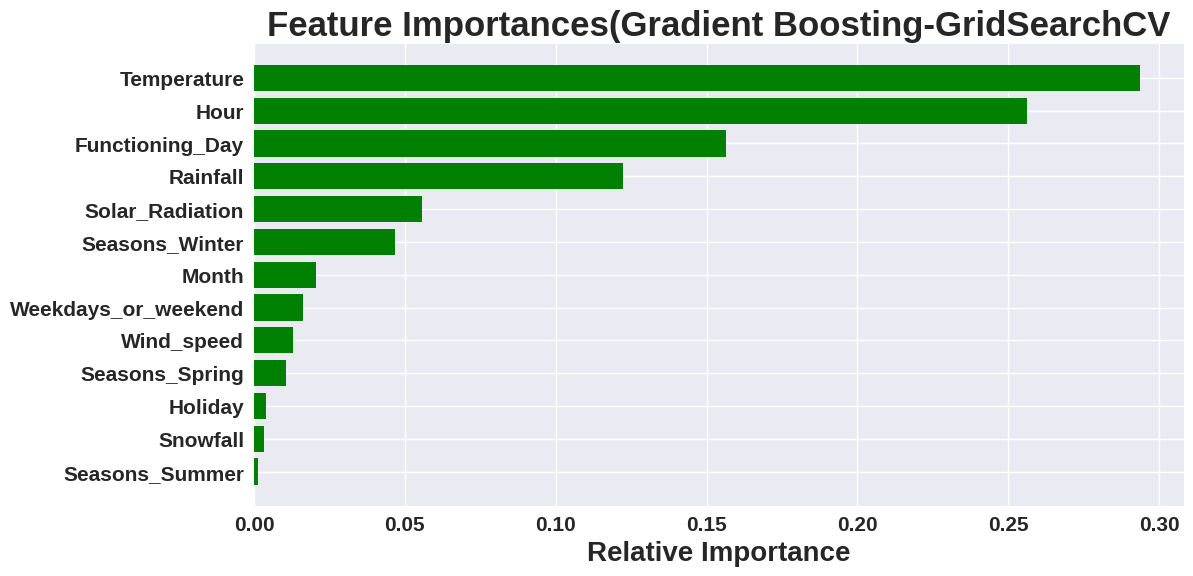

In [164]:
imp_variables=X.columns
importances = gradboo_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')


In [165]:
# Check Final dataframe of All models
final_result=pd.concat([traing_results_df,test_results_df],keys=['Training set','Test set'])
final_result


Model     MAE      MSE    RMSE  \
Training set 0                Linear Regression  5.8555  60.2995  7.7653   
             1                            Lasoo  5.8691  60.4640  7.7759   
             2               Ridge GridSearchCV  5.8691  60.4640  7.7759   
             3  ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040   
             4     Gardient boosting Regression  3.1772  20.5277  4.5308   
Test set     0                Linear Regression  5.8342  58.6242  7.6566   
             1                            Lasso  5.8506  58.7927  7.6676   
             2       Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676   
             3  ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001   
             4     Gradient Boosting Regression  3.2841  21.6810  4.6563   

                R2_score  
Training set 0    0.6124  
             1    0.6113  
             2    0.6113  
             3    0.6085  
             4    0.8680  
Test set     0    0.6183  
             1    0.6172  
             2    0.6172  
             3    0.6140  
             4    0.8588

## **Conclusion**:


* We have computed the MAE, MSE, RMSE, and R^2 scores for each model. We'll determine the model's performance based on the R^2 score.

* If the difference in R2 scores between the training data and test data exceeds 5%, we would regard the model as overfitting.

### **Linear,Lasso,Ridge and ElasticNet.**

From the provided data frame, it's evident that the linear, Lasso, Ridge, and Elastic regression models yield comparable R2 scores (around 61%) for both training and test datasets. This observation remains consistent even after employing GridSearchCV, yielding results akin to the base models.






### **Decision Tree Regressiom:**

* In the initial Decision Tree regressor model, without hyperparameter adjustments, we achieved a 100% r2 score on the training data but a significantly lower score on the test data. This indicates that the model overfitted and essentially memorized the training dataset.

* However, after fine-tuning the hyperparameters, the model's r2 score on the training data was 88%, and it achieved an 83% score on the test data, which is a satisfactory result for us.

### **Random Forest:**

On Random Forest regressor model, without hyperparameter tuning we got r2 score as 98% on training data and 90% on test data. Thus our model memorised the data.So it was a overfitted model, as per our assumption
After hyperparameter tuning we got r2 score as 90% on training data and 87% on test data which is very good for us.

### **Gradient Boosting Regression**

* Using the Random Forest regressor model without any hyperparameter adjustments, we achieved an r2 score of 86% on the training data and 85% on the test data, indicating a good performance by default.

* However, after fine-tuning the hyperparameters, our performance significantly improved, reaching an r2 score of 96% on the training data and 91% on the test data. This underscores the benefits of hyperparameter optimization in enhancing our model's performance.